In [1]:
!pip install scikit-plot


You should consider upgrading via the '/home/ccs/Notebooks/my_env/bin/python3.6 -m pip install --upgrade pip' command.


In [2]:
import sys
!{sys.executable} -m pip install xgboost

You should consider upgrading via the '/home/ccs/Notebooks/my_env/bin/python3.6 -m pip install --upgrade pip' command.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier as xgb
import warnings

In [4]:
%matplotlib inline
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")
plt.rc("font", family="serif", size=15)

In [5]:
PdM_errors_url="https://raw.githubusercontent.com/soumya-soman/predictive-maintenance/master/PdM_errors.csv"
 
errors = pd.read_csv(PdM_errors_url)
errors.head(5)


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [6]:
maint_url="https://raw.githubusercontent.com/soumya-soman/predictive-maintenance/master/PdM_maint.csv"
 
maint = pd.read_csv(maint_url)
maint.head(50)

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4
5,2015-01-05 06:00:00,1,comp1
6,2015-01-20 06:00:00,1,comp3
7,2015-01-20 06:00:00,1,comp1
8,2015-02-04 06:00:00,1,comp4
9,2015-02-04 06:00:00,1,comp3


In [162]:
# rows = maint['machineID'].groupby(
maint['datetime'].value_counts()
# rows.tail(50)

2014-11-28 06:00:00    37
2014-06-01 06:00:00    32
2014-06-16 06:00:00    31
2014-07-16 06:00:00    31
2014-08-30 06:00:00    29
                       ..
2015-02-11 06:00:00     1
2015-09-09 06:00:00     1
2015-11-10 06:00:00     1
2015-09-24 06:00:00     1
2015-01-14 06:00:00     1
Name: datetime, Length: 374, dtype: int64

In [150]:
failures_url="https://raw.githubusercontent.com/soumya-soman/predictive-maintenance/master/PdM_failures.csv"
 
failures = pd.read_csv(failures_url)
failures.head(50)

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4
5,2015-10-17 06:00:00,1,comp2
6,2015-12-16 06:00:00,1,comp4
7,2015-03-19 06:00:00,2,comp1
8,2015-03-19 06:00:00,2,comp2
9,2015-04-18 06:00:00,2,comp2


In [8]:
machines_url="https://raw.githubusercontent.com/soumya-soman/predictive-maintenance/master/PdM_machines.csv"
 
machines = pd.read_csv(machines_url)
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [9]:
machines['model'].value_counts()

model3    35
model4    32
model2    17
model1    16
Name: model, dtype: int64

In [10]:
telemetry_url="https://raw.githubusercontent.com/soumya-soman/predictive-maintenance/master/PdM_telemetry.csv"
 
telemetry = pd.read_csv(telemetry_url)
telemetry.tail()

,datetime,machineID,volt,rotate,pressure,vibration
968584,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941
968585,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072
968586,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561
968587,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259
968588,2016-01-01 06:00:00,100,171.336037,496.096870,79.095538,37.845245


In [11]:
telemetry.describe()

,machineID,volt,rotate,pressure,vibration
count,968589.000000,968589.000000,968589.000000,968588.000000,968588.000000
mean,46.230727,170.774142,446.591217,100.841515,40.383648
std,30.450414,15.507497,52.701692,11.028763,5.366198
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,18.000000,160.298216,412.278337,93.492369,36.778303
50%,45.000000,170.597661,447.555434,100.414332,40.237433
75%,73.000000,181.006239,482.154396,107.535244,43.781329
max,100.000000,255.124717,695.020984,185.951998,76.791072


In [12]:
telemetry.drop_duplicates(keep='first',inplace=True)

In [13]:
telemetry.describe()

,machineID,volt,rotate,pressure,vibration
count,876101.000000,876101.000000,876101.000000,876100.000000,876100.000000
mean,50.499955,170.777762,446.605132,100.858668,40.385007
std,28.866101,15.509124,52.673857,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.000000,160.304961,412.305749,93.498181,36.777299
50%,50.000000,170.607343,447.558205,100.425559,40.237247
75%,75.000000,181.004499,482.176586,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


In [14]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [15]:
telemetry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876101 entries, 0 to 968588
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   datetime   876101 non-null  object 
 1   machineID  876101 non-null  int64  
 2   volt       876101 non-null  float64
 3   rotate     876101 non-null  float64
 4   pressure   876100 non-null  float64
 5   vibration  876100 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 46.8+ MB


In [16]:
telemetry.dtypes

datetime      object
machineID      int64
volt         float64
rotate       float64
pressure     float64
vibration    float64
dtype: object

In [17]:
telemetry["machineID"].nunique()

100

In [18]:
telemetry["datetime"] = pd.to_datetime(telemetry["datetime"], format="%Y-%m-%d %H:%M:%S")
telemetry.dtypes

datetime     datetime64[ns]
machineID             int64
volt                float64
rotate              float64
pressure            float64
vibration           float64
dtype: object

In [19]:
telemetry['year'] = telemetry['datetime'].dt.year
telemetry['month'] = telemetry['datetime'].dt.month
telemetry['day'] = telemetry['datetime'].dt.day
telemetry

,datetime,machineID,volt,rotate,pressure,vibration,year,month,day
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,2015,1,1
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,2015,1,1
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,2015,1,1
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,2015,1,1
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,2015,1,1
...,...,...,...,...,...,...,...,...,...
968584,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941,2016,1,1
968585,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072,2016,1,1
968586,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561,2016,1,1
968587,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259,2016,1,1


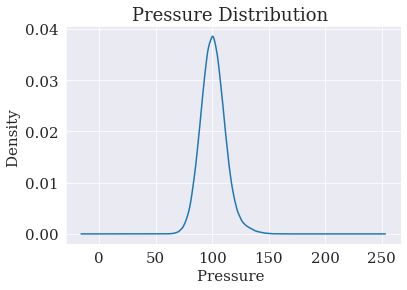

In [20]:
telemetry["pressure"].plot(kind="kde")
plt.title("Pressure Distribution ")
plt.ylabel("Density ")
plt.xlabel("Pressure ")
plt.show()

In [21]:
telemetry.describe() 

,machineID,volt,rotate,pressure,vibration,year,month,day
count,876101.000000,876101.000000,876101.000000,876100.000000,876100.000000,876101.000000,876101.000000,876101.000000
mean,50.499955,170.777762,446.605132,100.858668,40.385007,2015.000799,6.525397,15.718876
std,28.866101,15.509124,52.673857,11.048679,5.370361,0.028255,3.448160,8.797154
min,1.000000,97.333604,138.432075,51.237106,14.877054,2015.000000,1.000000,1.000000
25%,25.000000,160.304961,412.305749,93.498181,36.777299,2015.000000,4.000000,8.000000
50%,50.000000,170.607343,447.558205,100.425559,40.237247,2015.000000,7.000000,16.000000
75%,75.000000,181.004499,482.176586,107.555231,43.784938,2015.000000,10.000000,23.000000
max,100.000000,255.124717,695.020984,185.951998,76.791072,2016.000000,12.000000,31.000000


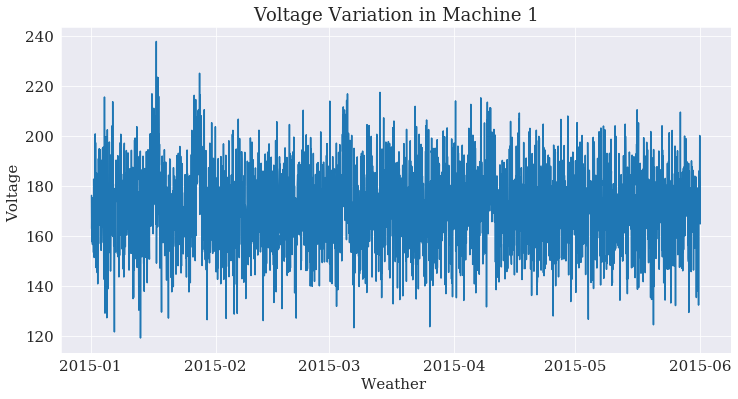

In [22]:
# We show an example graph of the voltage values ​​for machine 1 during the first 6 months of 2015.

plot_df = telemetry.loc[
    (telemetry["machineID"] == 1)
    & (telemetry["datetime"] > pd.to_datetime("2015-01-01"))
    & (telemetry["datetime"] < pd.to_datetime("2015-06-01")), ["datetime", "volt"]
]

plt.figure(figsize=(12, 6))
plt.plot(plot_df["datetime"], plot_df["volt"])
plt.title("Voltage Variation in Machine 1")
plt.ylabel("Voltage ")

# We make labels legible.
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = "%m-%d"
plt.xlabel("Weather ")
plt.show()

In [23]:
##ERROR DATA ANALYSIS
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [24]:
errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3919 non-null   object
 1   machineID  3919 non-null   int64 
 2   errorID    3919 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.0+ KB


In [25]:
errors.drop_duplicates(keep='first',inplace=True)
errors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3919 non-null   object
 1   machineID  3919 non-null   int64 
 2   errorID    3919 non-null   object
dtypes: int64(1), object(2)
memory usage: 122.5+ KB


In [26]:
# Formatting the date and time field that comes as a string.
# Categories allow comparison between values, automatic ordering, easier graphing and other functions.
# Also less memory (similar to "factor" in R).
errors["datetime"] = pd.to_datetime(errors["datetime"], format="%Y-%m-%d %H:%M:%S")
errors["errorID"] = errors["errorID"].astype("category")
errors['year'] = errors['datetime'].dt.year
errors['month'] = errors['datetime'].dt.month
errors['day'] = errors['datetime'].dt.day

errors.head()

,datetime,machineID,errorID,year,month,day
0,2015-01-03 07:00:00,1,error1,2015,1,3
1,2015-01-03 20:00:00,1,error3,2015,1,3
2,2015-01-04 06:00:00,1,error5,2015,1,4
3,2015-01-10 15:00:00,1,error4,2015,1,10
4,2015-01-22 10:00:00,1,error4,2015,1,22


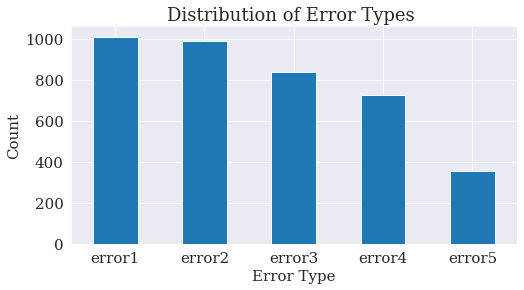

In [27]:
#sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
errors["errorID"].value_counts().plot(kind="bar", rot=0)
plt.title("Distribution of Error Types ")
plt.ylabel("Count")
plt.xlabel("Error Type")
plt.show()

In [28]:
## MAINT DATA ANALYSIS
maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [29]:
maint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3286 non-null   object
 1   machineID  3286 non-null   int64 
 2   comp       3286 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.1+ KB


In [30]:
maint.drop_duplicates(keep='first',inplace=True)
maint.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3286 non-null   object
 1   machineID  3286 non-null   int64 
 2   comp       3286 non-null   object
dtypes: int64(1), object(2)
memory usage: 102.7+ KB


In [31]:
# Formatting the date and time field that comes as a string.
maint["datetime"] = pd.to_datetime(maint["datetime"], format="%Y-%m-%d %H:%M:%S")
maint['year'] = maint['datetime'].dt.year
maint['month'] = maint['datetime'].dt.month
maint['day'] = maint['datetime'].dt.day
maint["comp"] = maint["comp"].astype("category")
maint.dtypes

datetime     datetime64[ns]
machineID             int64
comp               category
year                  int64
month                 int64
day                   int64
dtype: object

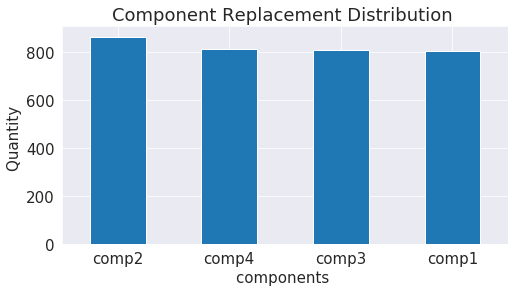

In [32]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
maint["comp"].value_counts().plot(kind="bar", rot=0)
plt.title("Component Replacement Distribution ")
plt.ylabel("Quantity ")
plt.xlabel("components ")
plt.show()

In [33]:
##Machines data analysis
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [34]:
machines.shape
machines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   machineID  100 non-null    int64 
 1   model      100 non-null    object
 2   age        100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [35]:
machines.drop_duplicates(keep='first',inplace=True)
machines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   machineID  100 non-null    int64 
 1   model      100 non-null    object
 2   age        100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.1+ KB


In [36]:
machines.dtypes

machineID     int64
model        object
age           int64
dtype: object

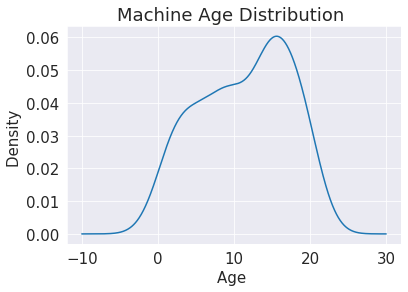

In [37]:
# We check if there are several hills as it can suggest two different groups.
machines["age"].plot(kind="kde")
plt.title("Machine Age Distribution ")
plt.xlabel("Age ")
plt.ylabel("Density ")
plt.show()

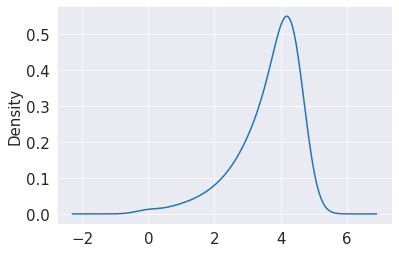

In [38]:
# We apply natural logarithm to normalize.
np.log(machines[machines["age"] != 0].iloc[:, 0]).plot(kind="kde")
plt.show()

In [39]:
machines["model"] = machines["model"].astype("category")
machines.dtypes

machineID       int64
model        category
age             int64
dtype: object

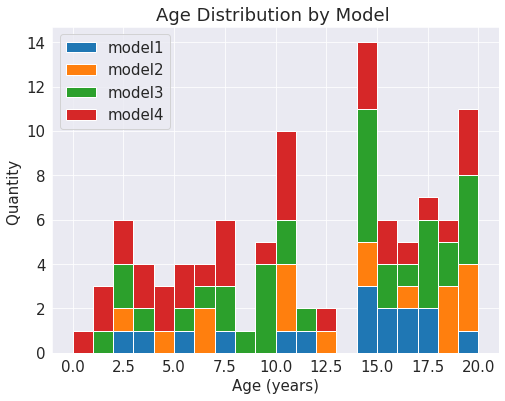

In [40]:
plt.figure(figsize=(8, 6))
_, bins, _ = plt.hist([
    machines.loc[machines["model"] == "model1", "age"],
    machines.loc[machines["model"] == "model2", "age"],
    machines.loc[machines["model"] == "model3", "age"],
    machines.loc[machines["model"] == "model4", "age"]],
    20, stacked=True, label=["model1", "model2", "model3", "model4"
])
plt.title("Age Distribution by Model ")
plt.xlabel("Age (years)")
plt.ylabel("Quantity ")
plt.legend()
plt.show()

In [41]:
## Failures data analysis
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [42]:
failures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   761 non-null    object
 1   machineID  761 non-null    int64 
 2   failure    761 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.0+ KB


In [43]:
failures.drop_duplicates(keep='first',inplace=True)
failures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   761 non-null    object
 1   machineID  761 non-null    int64 
 2   failure    761 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.8+ KB


In [44]:
# We format the datetime that comes as a string
failures["datetime"] = pd.to_datetime(failures["datetime"], format="%Y-%m-%d %H:%M:%S")
failures['year'] = failures['datetime'].dt.year
failures['month'] = failures['datetime'].dt.month
failures['day'] = failures['datetime'].dt.day
failures["failure"] = failures["failure"].astype("category")
failures.dtypes

datetime     datetime64[ns]
machineID             int64
failure            category
year                  int64
month                 int64
day                   int64
dtype: object

In [45]:
failures.describe(include="all")

,datetime,machineID,failure,year,month,day
count,761,761.000000,761,761.0,761.000000,761.000000
unique,302,NaN,4,NaN,NaN,NaN
top,2015-01-02 03:00:00,NaN,comp2,NaN,NaN,NaN
freq,18,NaN,259,NaN,NaN,NaN
first,2015-01-02 03:00:00,NaN,NaN,NaN,NaN,NaN
last,2015-12-31 06:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,51.911958,NaN,2015.0,6.289093,15.170828
std,NaN,29.515542,NaN,0.0,3.521812,9.266365
min,NaN,1.000000,NaN,2015.0,1.000000,1.000000
25%,NaN,24.000000,NaN,2015.0,3.000000,6.000000


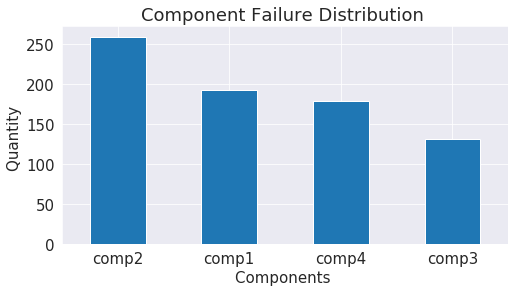

In [46]:
plt.figure(figsize=(8, 4))
failures["failure"].value_counts().plot(kind="bar", rot=0)
plt.title("Component Failure Distribution ")
plt.ylabel("Quantity ")
plt.xlabel("Components ")
plt.show()

In [47]:
# We calculate average values ​​for telemetry characteristics
# we pivot because we need the datetime as an index for "resample" to work
# resample creates the lagging
# closed = 'right' => (6:00, 9:00] or 6:00 < x <= 9:00
# closed='left'  => [6:00, 9:00) or 6:00 <= x < 9:00
# it can't be both
# unstack: return df to original format
# we have 100 machines, 4 sensors = 400 columns
# unstack shows a dataseries in the columns as an index and returns series (if there are several indexes they are rearranged).
# Each dataframe in temp has the values ​​of the field that corresponds to it at that moment.

temp = []
fields = ["volt", "rotate", "pressure", "vibration"]
temp = [
    pd.pivot_table(
        telemetry,
        index="datetime",
        columns="machineID",
        values=col).resample("3H", closed="left", label="right").mean().unstack()
    for col in fields
]
temp[1].head()

machineID  datetime           
1          2015-01-01 09:00:00    449.533798
           2015-01-01 12:00:00    403.949857
           2015-01-01 15:00:00    435.781707
           2015-01-01 18:00:00    430.472823
           2015-01-01 21:00:00    437.111120
dtype: float64

In [48]:
telemetry

,datetime,machineID,volt,rotate,pressure,vibration,year,month,day
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,2015,1,1
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,2015,1,1
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,2015,1,1
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,2015,1,1
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,2015,1,1
...,...,...,...,...,...,...,...,...,...
968584,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941,2016,1,1
968585,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072,2016,1,1
968586,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561,2016,1,1
968587,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259,2016,1,1


In [49]:
temp

[machineID  datetime           
 1          2015-01-01 09:00:00    170.028993
            2015-01-01 12:00:00    164.192565
            2015-01-01 15:00:00    168.134445
            2015-01-01 18:00:00    165.514453
            2015-01-01 21:00:00    168.809347
                                      ...    
 100        2015-12-31 21:00:00    166.078945
            2016-01-01 00:00:00    158.327984
            2016-01-01 03:00:00    170.306956
            2016-01-01 06:00:00    182.525427
            2016-01-01 09:00:00    171.336037
 Length: 292100, dtype: float64,
 machineID  datetime           
 1          2015-01-01 09:00:00    449.533798
            2015-01-01 12:00:00    403.949857
            2015-01-01 15:00:00    435.781707
            2015-01-01 18:00:00    430.472823
            2015-01-01 21:00:00    437.111120
                                      ...    
 100        2015-12-31 21:00:00    424.431184
            2016-01-01 00:00:00    504.056262
            2016-01-01 03:00:

In [50]:
telemetry.describe()

,machineID,volt,rotate,pressure,vibration,year,month,day
count,876101.000000,876101.000000,876101.000000,876100.000000,876100.000000,876101.000000,876101.000000,876101.000000
mean,50.499955,170.777762,446.605132,100.858668,40.385007,2015.000799,6.525397,15.718876
std,28.866101,15.509124,52.673857,11.048679,5.370361,0.028255,3.448160,8.797154
min,1.000000,97.333604,138.432075,51.237106,14.877054,2015.000000,1.000000,1.000000
25%,25.000000,160.304961,412.305749,93.498181,36.777299,2015.000000,4.000000,8.000000
50%,50.000000,170.607343,447.558205,100.425559,40.237247,2015.000000,7.000000,16.000000
75%,75.000000,181.004499,482.176586,107.555231,43.784938,2015.000000,10.000000,23.000000
max,100.000000,255.124717,695.020984,185.951998,76.791072,2016.000000,12.000000,31.000000


In [51]:
telemetry_mean_3h = pd.concat(temp, axis=1) # We unite the series.
telemetry_mean_3h.columns = [col + "mean_3h" for col in fields] # We assign column names.
telemetry_mean_3h.reset_index(inplace=True) # We flatten the frame.
telemetry_mean_3h.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


In [52]:
telemetry_mean_3h.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
count,292100.000000,292100.000000,292100.000000,292100.000000,292100.000000
mean,50.500000,170.778609,446.603743,100.858983,40.385180
std,28.866119,9.504636,33.139576,7.416963,3.479687
min,1.000000,125.532506,211.811184,72.118639,26.569635
25%,25.750000,164.449465,427.552297,96.238330,38.147563
50%,50.500000,170.435196,448.380810,100.234420,40.145855
75%,75.250000,176.613713,468.452496,104.407388,42.228094
max,100.000000,241.420717,586.682904,162.309656,69.311324


In [53]:
# We repeat for the standard deviation.
temp = [
    pd.pivot_table(
        telemetry,
        index="datetime",
        columns="machineID",
        values=col).resample("3H", closed="left", label="right").std().unstack()
    for col in fields
]
temp[0].head()

machineID  datetime           
1          2015-01-01 09:00:00     6.721032
           2015-01-01 12:00:00     7.596570
           2015-01-01 15:00:00    10.124584
           2015-01-01 18:00:00     4.673269
           2015-01-01 21:00:00    14.752132
dtype: float64

In [54]:
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + "sd_3h" for i in fields]
telemetry_sd_3h.reset_index(inplace=True)
telemetry_sd_3h.head()

,machineID,datetime,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h
0,1,2015-01-01 09:00:00,6.721032,67.849599,18.934956,5.874970
1,1,2015-01-01 12:00:00,7.596570,50.120452,8.555032,7.662229
2,1,2015-01-01 15:00:00,10.124584,55.084734,5.909721,5.169304
3,1,2015-01-01 18:00:00,4.673269,42.047278,4.554047,2.106108
4,1,2015-01-01 21:00:00,14.752132,47.048609,4.244158,2.207884


In [55]:
telemetry_sd_3h.describe()

,machineID,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h
count,292100.000000,292000.000000,292000.000000,292000.000000,292000.000000
mean,50.500000,13.299090,44.456338,8.885976,4.441164
std,28.866119,6.965914,23.216712,4.656211,2.320302
min,1.000000,0.025509,0.078991,0.027417,0.015278
25%,25.750000,8.027455,26.903705,5.370581,2.684790
50%,50.500000,12.495658,41.794719,8.346020,4.173955
75%,75.250000,17.688490,59.104130,11.790303,5.900106
max,100.000000,58.444332,179.903039,35.659369,18.305595


In [56]:
# To capture a longer-term effect, the 24-hour lagging functions are also calculated.
# We create new values ​​with 24-hour averages, and then select the first result every 3 hours.
# In this way we can join the results with the previous lagging characteristics (calculated at 3 hours).

temp = []
fields = ["volt", "rotate", "pressure", "vibration"]

temp = [
    pd.pivot_table(
        telemetry,
        index="datetime",
        columns="machineID",
        values=col).rolling(window=48).mean().resample("3H", closed="left", label="right").first().unstack()
    for col in fields
]
temp[0].head(10)

machineID  datetime           
1          2015-01-01 09:00:00   NaN
           2015-01-01 12:00:00   NaN
           2015-01-01 15:00:00   NaN
           2015-01-01 18:00:00   NaN
           2015-01-01 21:00:00   NaN
           2015-01-02 00:00:00   NaN
           2015-01-02 03:00:00   NaN
           2015-01-02 06:00:00   NaN
           2015-01-02 09:00:00   NaN
           2015-01-02 12:00:00   NaN
dtype: float64

In [57]:
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + "mean_24h" for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
# Due to the moving average method, the first 23 records are null; you have to eliminate them.
# It does not happen at the end of the frame because rolling stops at the end.
# We end up with a frame of less data than the original telemetry as well as the previous 3H.
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h["voltmean_24h"].isnull()]
telemetry_mean_24h.head()

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
15,1,2015-01-03 06:00:00,170.045337,449.711370,98.792391,39.428496
16,1,2015-01-03 09:00:00,170.074009,450.574966,98.450176,39.593280
17,1,2015-01-03 12:00:00,170.379989,455.440349,98.538116,40.132507
18,1,2015-01-03 15:00:00,171.142547,453.967427,97.815969,41.313110
19,1,2015-01-03 18:00:00,171.018509,456.380525,97.310014,42.332014


In [58]:
telemetry_mean_24h.describe()

,machineID,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
count,290600.00000,290600.000000,290600.000000,290600.000000,290600.000000
mean,50.50000,170.769453,446.616960,100.852727,40.384060
std,28.86612,3.873467,15.174299,4.085218,1.756756
min,1.00000,160.747640,279.892032,93.157260,36.841039
25%,25.75000,168.669914,443.666930,99.075815,39.555256
50%,50.50000,170.194615,449.241002,100.097552,40.068193
75%,75.25000,171.840394,454.374684,101.189486,40.624740
max,100.00000,215.520815,483.074597,149.520972,60.618935


In [59]:
# We repeat for the standard deviation
temp = []
fields = ["volt", "rotate", "pressure", "vibration"]

temp = [
    pd.pivot_table(
        telemetry,
        index="datetime",
        columns="machineID",
        values=col).rolling(window=48).std().resample("3H", closed="left", label="right").first().unstack(level=-1)
    for col in fields
]
temp[0].head()

machineID  datetime           
1          2015-01-01 09:00:00   NaN
           2015-01-01 12:00:00   NaN
           2015-01-01 15:00:00   NaN
           2015-01-01 18:00:00   NaN
           2015-01-01 21:00:00   NaN
dtype: float64

In [60]:
telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + "sd_24h" for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h["voltsd_24h"].isnull()]
telemetry_sd_24h.head(10)

,machineID,datetime,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
15,1,2015-01-03 06:00:00,13.132056,44.714296,10.826645,5.526109
16,1,2015-01-03 09:00:00,13.147313,44.498525,10.623186,5.809134
17,1,2015-01-03 12:00:00,13.103691,43.311082,10.174171,6.100367
18,1,2015-01-03 15:00:00,13.411673,43.239659,9.886749,6.558257
19,1,2015-01-03 18:00:00,13.923105,42.422389,10.199362,7.717225
20,1,2015-01-03 21:00:00,13.915484,41.318601,10.173001,7.797392
21,1,2015-01-04 00:00:00,13.752059,42.354282,10.132364,8.254455
22,1,2015-01-04 03:00:00,13.937006,43.075127,10.297286,8.257079
23,1,2015-01-04 06:00:00,14.144209,42.477746,10.550469,8.887020
24,1,2015-01-04 09:00:00,13.350954,42.616693,10.347356,8.561912


In [61]:
telemetry_sd_24h.describe()

,machineID,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,290600.00000,290600.000000,290600.000000,290600.000000,290600.000000
mean,50.50000,15.078699,50.610236,10.242949,5.082700
std,28.86612,1.679732,6.019023,1.586779,0.672723
min,1.00000,8.572887,28.916424,5.585285,2.883879
25%,25.75000,13.932538,46.601645,9.299843,4.651582
50%,50.50000,15.004498,50.173932,10.020077,5.011155
75%,75.25000,16.133064,53.992402,10.803915,5.401470
max,100.00000,29.530469,104.933839,28.251997,11.419040


In [62]:
# We combine the features created so far.
# We take the values ​​2: 6 to avoid duplicate IDs and dates.
# axis = 0 we move in the direction of the rows, axis = 1, we move in the direction of the columns.
telemetry_feat = pd.concat([
    telemetry_mean_3h,
    telemetry_sd_3h.iloc[:, 2:6],
    telemetry_mean_24h.iloc[:, 2:6],
    telemetry_sd_24h.iloc[:, 2:6]], axis=1).dropna()
telemetry_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
15,1,2015-01-03 06:00:00,181.690108,472.783187,93.395164,38.621099,11.514450,47.880443,2.177029,7.670520,170.045337,449.711370,98.792391,39.428496,13.132056,44.714296,10.826645,5.526109
16,1,2015-01-03 09:00:00,172.382935,505.141261,98.524373,49.965572,7.065150,56.849540,5.230039,2.687565,170.074009,450.574966,98.450176,39.593280,13.147313,44.498525,10.623186,5.809134
17,1,2015-01-03 12:00:00,174.303858,436.182686,94.092681,50.999589,19.017196,26.420163,7.661944,3.516734,170.379989,455.440349,98.538116,40.132507,13.103691,43.311082,10.174171,6.100367
18,1,2015-01-03 15:00:00,176.246348,451.646684,98.102389,59.198241,12.572504,31.574383,15.559351,6.562087,171.142547,453.967427,97.815969,41.313110,13.411673,43.239659,9.886749,6.558257
19,1,2015-01-03 18:00:00,158.433533,453.900213,98.878129,46.851925,5.136952,21.216569,11.400650,2.688559,171.018509,456.380525,97.310014,42.332014,13.923105,42.422389,10.199362,7.717225


In [63]:
telemetry_feat.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,290500.00000,290500.000000,290500.000000,290500.000000,290500.000000,290500.000000,290500.000000,290500.000000,290500.000000,290500.000000,290500.000000,290500.000000,290500.000000,290500.000000,290500.000000,290500.000000,290500.000000
mean,50.50000,170.770861,446.617765,100.855611,40.383571,13.298272,44.459681,8.886753,4.440596,170.769103,446.617217,100.852322,40.384018,15.078531,50.609666,10.242839,5.082678
std,28.86612,9.497163,33.117121,7.408122,3.475394,6.966356,23.216965,4.656400,2.320034,3.873161,15.174594,4.084123,1.756782,1.679652,6.018818,1.586619,0.672638
min,1.00000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,160.747640,279.892032,93.157260,36.841039,8.572887,28.916424,5.585285,2.883879
25%,25.75000,164.445707,427.568132,96.239153,38.147287,8.026658,26.910114,5.371535,2.684227,168.669884,443.666930,99.075811,39.555216,13.932484,46.601414,9.299824,4.651623
50%,50.50000,170.430366,448.389150,100.233244,40.146063,12.493246,41.797707,8.346630,4.173890,170.194606,449.241239,100.097440,40.068161,15.004424,50.173468,10.020070,5.011135
75%,75.25000,176.605921,468.444197,104.404540,42.226863,17.687701,59.109190,11.791027,5.899139,171.840211,454.374861,101.189466,40.624620,16.132925,53.991995,10.803847,5.401454
max,100.00000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,215.520815,483.074597,149.520972,60.618935,29.530469,104.933839,28.251997,11.419040


In [64]:
##Characteristics Lag in Errors
"""
We start by reformatting the error data to have one input per machine per time
when at least one error occurred.
We create a column for each type of error.
"""
error_count = pd.get_dummies(errors) # We put a 1 if the error appears for that machine, 0 otherwise.
error_count.columns = ["datetime", "machineID","year" ,"month","day","error1", "error2", "error3", "error4", "error5"]
error_count.head(15)

,datetime,machineID,year,month,day,error1,error2,error3,error4,error5
0,2015-01-03 07:00:00,1,2015,1,3,1,0,0,0,0
1,2015-01-03 20:00:00,1,2015,1,3,0,0,1,0,0
2,2015-01-04 06:00:00,1,2015,1,4,0,0,0,0,1
3,2015-01-10 15:00:00,1,2015,1,10,0,0,0,1,0
4,2015-01-22 10:00:00,1,2015,1,22,0,0,0,1,0
5,2015-01-25 15:00:00,1,2015,1,25,0,0,0,1,0
6,2015-01-27 04:00:00,1,2015,1,27,1,0,0,0,0
7,2015-03-03 22:00:00,1,2015,3,3,0,1,0,0,0
8,2015-03-05 06:00:00,1,2015,3,5,1,0,0,0,0
9,2015-03-20 18:00:00,1,2015,3,20,1,0,0,0,0


In [65]:
error_count.describe()

,machineID,year,month,day,error1,error2,error3,error4,error5
count,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000
mean,51.044654,2015.000510,6.484818,15.518755,0.257719,0.252105,0.213830,0.185507,0.090839
std,28.954988,0.022588,3.465459,8.802008,0.437434,0.434277,0.410061,0.388758,0.287417
min,1.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,2015.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,2015.000000,7.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,77.000000,2015.000000,10.000000,23.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,100.000000,2016.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
"""
The dates in the dataframe are repeated, so we group by date.
We combine errors for a given machine at a specific time.
We do sum in case there are multiple errors of the same type at the same time, but not expected.
"""
error_count_grouped = error_count.groupby(["machineID", "datetime","year" ,"month","day",]).sum().reset_index()
error_count_grouped.head(5)

,machineID,datetime,year,month,day,error1,error2,error3,error4,error5
0,1,2015-01-03 07:00:00,2015,1,3,1,0,0,0,0
1,1,2015-01-03 20:00:00,2015,1,3,0,0,1,0,0
2,1,2015-01-04 06:00:00,2015,1,4,0,0,0,0,1
3,1,2015-01-10 15:00:00,2015,1,10,0,0,0,1,0
4,1,2015-01-22 10:00:00,2015,1,22,0,0,0,1,0


In [67]:
error_count_grouped.describe()

,machineID,year,month,day,error1,error2,error3,error4,error5
count,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.00000,3616.000000,3616.000000,3616.000000
mean,51.119192,2015.000553,6.481748,15.430310,0.279314,0.27323,0.231748,0.201051,0.098451
std,28.870118,0.023515,3.463175,8.800768,0.448724,0.44568,0.422007,0.400841,0.297965
min,1.000000,2015.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,26.000000,2015.000000,3.000000,8.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,52.000000,2015.000000,7.000000,15.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,76.000000,2015.000000,10.000000,23.000000,1.000000,1.00000,0.000000,0.000000,0.000000
max,100.000000,2016.000000,12.000000,31.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [68]:
"""
We check that the registered errors exist in the available machines filled with 0
the non-matches so we only search for a match with datetime and machineID.
"""
error_count_filtered = telemetry[["datetime", "machineID","year" ,"month","day",]].merge(
    error_count_grouped,
    on=["machineID", "datetime","year" ,"month","day",],
    how="left"
).fillna(0.0)

error_count_filtered.sample(50)

,datetime,machineID,year,month,day,error1,error2,error3,error4,error5
54559,2015-03-25 07:00:00,7,2015,3,25,0.0,0.0,0.0,0.0,0.0
84827,2015-09-07 08:00:00,10,2015,9,7,0.0,0.0,0.0,0.0,0.0
811261,2015-08-07 22:00:00,93,2015,8,7,0.0,0.0,0.0,0.0,0.0
693550,2015-03-01 20:00:00,80,2015,3,1,0.0,0.0,0.0,0.0,0.0
154061,2015-08-02 17:00:00,18,2015,8,2,0.0,0.0,0.0,0.0,0.0
649623,2015-02-24 18:00:00,75,2015,2,24,0.0,0.0,0.0,0.0,0.0
411130,2015-12-05 17:00:00,47,2015,12,5,0.0,0.0,0.0,0.0,0.0
808581,2015-04-18 06:00:00,93,2015,4,18,0.0,0.0,0.0,0.0,0.0
272894,2015-02-24 12:00:00,32,2015,2,24,0.0,0.0,0.0,0.0,0.0
514852,2015-10-07 23:00:00,59,2015,10,7,0.0,0.0,0.0,0.0,0.0


In [69]:
error_count_filtered.describe()

,machineID,year,month,day,error1,error2,error3,error4,error5
count,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000
mean,50.499955,2015.000799,6.525397,15.718876,0.001153,0.001128,0.000957,0.000830,0.000406
std,28.866101,0.028255,3.448160,8.797154,0.033934,0.033563,0.030913,0.028795,0.020154
min,1.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,2015.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,2015.000000,7.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,2015.000000,10.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,2016.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
# We check that there are no anomalies.
error_count_filtered.describe()

,machineID,year,month,day,error1,error2,error3,error4,error5
count,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000
mean,50.499955,2015.000799,6.525397,15.718876,0.001153,0.001128,0.000957,0.000830,0.000406
std,28.866101,0.028255,3.448160,8.797154,0.033934,0.033563,0.030913,0.028795,0.020154
min,1.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,2015.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,2015.000000,7.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,2015.000000,10.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,2016.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
# We calculate the total number of errors for each type of error during 24-hour periods. 
# We will take points every 3 hours.

temp = []
fields = [
    "error%d" % i
    for i in range(1,6)
]

temp = [
    pd.pivot_table(
        error_count_filtered,
        index="datetime",
        columns="machineID",
        values=col).rolling(window=48).sum().resample("3H", closed="left", label="right").first().unstack()
    for col in fields
]
temp[0].head(10)

machineID  datetime           
1          2015-01-01 09:00:00   NaN
           2015-01-01 12:00:00   NaN
           2015-01-01 15:00:00   NaN
           2015-01-01 18:00:00   NaN
           2015-01-01 21:00:00   NaN
           2015-01-02 00:00:00   NaN
           2015-01-02 03:00:00   NaN
           2015-01-02 06:00:00   NaN
           2015-01-02 09:00:00   NaN
           2015-01-02 12:00:00   NaN
dtype: float64

In [72]:
error_count_total = pd.concat(temp, axis=1)
error_count_total.columns = [i + "count" for i in fields]
error_count_total.reset_index(inplace=True)
error_count_total = error_count_total.dropna()
error_count_total.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
15,1,2015-01-03 06:00:00,0.0,0.0,0.0,0.0,0.0
16,1,2015-01-03 09:00:00,0.0,0.0,0.0,0.0,0.0
17,1,2015-01-03 12:00:00,1.0,0.0,0.0,0.0,0.0
18,1,2015-01-03 15:00:00,1.0,0.0,0.0,0.0,0.0
19,1,2015-01-03 18:00:00,1.0,0.0,0.0,0.0,0.0


In [73]:
error_count_total["error5count"].unique()

array([0., 1., 2.])

In [74]:
error_count_total.describe()

,machineID,error1count,error2count,error3count,error4count,error5count
count,290600.00000,290600.000000,290600.000000,290600.000000,290600.000000,290600.000000
mean,50.50000,0.055286,0.054219,0.045847,0.039876,0.019532
std,28.86612,0.235128,0.232626,0.214305,0.199707,0.139993
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.50000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.25000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.00000,3.000000,3.000000,3.000000,3.000000,2.000000


In [75]:
#Time since Last Maintenance Replacement
maint.head()

,datetime,machineID,comp,year,month,day
0,2014-06-01 06:00:00,1,comp2,2014,6,1
1,2014-07-16 06:00:00,1,comp4,2014,7,16
2,2014-07-31 06:00:00,1,comp3,2014,7,31
3,2014-12-13 06:00:00,1,comp1,2014,12,13
4,2015-01-05 06:00:00,1,comp4,2015,1,5


In [76]:
# we create a column for each type of error
comp_rep = pd.get_dummies(maint)
comp_rep.columns = ["datetime", "machineID","year" ,"month","day", "comp1", "comp2", "comp3", "comp4"]
comp_rep.head(25)

,datetime,machineID,year,month,day,comp1,comp2,comp3,comp4
0,2014-06-01 06:00:00,1,2014,6,1,0,1,0,0
1,2014-07-16 06:00:00,1,2014,7,16,0,0,0,1
2,2014-07-31 06:00:00,1,2014,7,31,0,0,1,0
3,2014-12-13 06:00:00,1,2014,12,13,1,0,0,0
4,2015-01-05 06:00:00,1,2015,1,5,0,0,0,1
5,2015-01-05 06:00:00,1,2015,1,5,1,0,0,0
6,2015-01-20 06:00:00,1,2015,1,20,0,0,1,0
7,2015-01-20 06:00:00,1,2015,1,20,1,0,0,0
8,2015-02-04 06:00:00,1,2015,2,4,0,0,0,1
9,2015-02-04 06:00:00,1,2015,2,4,0,0,1,0


In [77]:
#   **************************************************         #
# If we don't group by date we can see another perspective.
# We find which components fail together, since we group by date.
comp_rep = comp_rep.groupby(["machineID", "datetime","year" ,"month","day",]).sum().reset_index()
comp_rep.head(50)

,machineID,datetime,year,month,day,comp1,comp2,comp3,comp4
0,1,2014-06-01 06:00:00,2014,6,1,0,1,0,0
1,1,2014-07-16 06:00:00,2014,7,16,0,0,0,1
2,1,2014-07-31 06:00:00,2014,7,31,0,0,1,0
3,1,2014-12-13 06:00:00,2014,12,13,1,0,0,0
4,1,2015-01-05 06:00:00,2015,1,5,1,0,0,1
5,1,2015-01-20 06:00:00,2015,1,20,1,0,1,0
6,1,2015-02-04 06:00:00,2015,2,4,0,0,1,1
7,1,2015-02-19 06:00:00,2015,2,19,0,0,1,0
8,1,2015-03-06 06:00:00,2015,3,6,1,0,0,0
9,1,2015-03-21 06:00:00,2015,3,21,1,0,0,0


In [78]:
# 
#
#
#
#
#you have to add the times where there were no replacements
comp_rep = telemetry[["datetime", "machineID","year" ,"month","day"]].merge(
    comp_rep,
    on=["datetime", "machineID","year" ,"month","day"],
    how="outer").fillna(0).sort_values(by=["machineID", "datetime","year" ,"month","day"]
)
comp_rep.head(50)

,datetime,machineID,year,month,day,comp1,comp2,comp3,comp4
876101,2014-06-01 06:00:00,1,2014,6,1,0.0,1.0,0.0,0.0
876102,2014-07-16 06:00:00,1,2014,7,16,0.0,0.0,0.0,1.0
876103,2014-07-31 06:00:00,1,2014,7,31,0.0,0.0,1.0,0.0
876104,2014-12-13 06:00:00,1,2014,12,13,1.0,0.0,0.0,0.0
0,2015-01-01 06:00:00,1,2015,1,1,0.0,0.0,0.0,0.0
1,2015-01-01 07:00:00,1,2015,1,1,0.0,0.0,0.0,0.0
2,2015-01-01 08:00:00,1,2015,1,1,0.0,0.0,0.0,0.0
3,2015-01-01 09:00:00,1,2015,1,1,0.0,0.0,0.0,0.0
4,2015-01-01 10:00:00,1,2015,1,1,0.0,0.0,0.0,0.0
5,2015-01-01 11:00:00,1,2015,1,1,0.0,0.0,0.0,0.0


In [79]:
comp_rep.describe()

,machineID,year,month,day,comp1,comp2,comp3,comp4
count,876466.000000,876466.000000,876466.000000,876466.000000,876466.000000,876466.000000,876466.000000,876466.000000
mean,50.499542,2015.000382,6.526316,15.719981,0.000917,0.000985,0.000922,0.000925
std,28.865945,0.034856,3.447970,8.797791,0.030273,0.031363,0.030349,0.030405
min,1.000000,2014.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,2015.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,2015.000000,7.000000,16.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,2015.000000,10.000000,23.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,2016.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
components = ["comp1", "comp2", "comp3", "comp4"]
for comp in components:
    # We want to get the date of the most recent component change.
    comp_rep.loc[comp_rep[comp] < 1, comp] = None # We fill the samples with null without replacement.
    # the dates of the entries that do have replacements.
    comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(), "datetime"]
    # We do a forward-fill of the most recent dates of a component change.
    # We fill with the last valid value found top-bottom.
    comp_rep[comp] = pd.to_datetime(comp_rep[comp].fillna(method="ffill"))

# We eliminated samples from 2014, they could have null, the maintenance began that year.
comp_rep = comp_rep.loc[comp_rep["datetime"] > pd.to_datetime("2015-01-01")]
comp_rep.head(50)

,datetime,machineID,year,month,day,comp1,comp2,comp3,comp4
0,2015-01-01 06:00:00,1,2015,1,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
1,2015-01-01 07:00:00,1,2015,1,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
2,2015-01-01 08:00:00,1,2015,1,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
3,2015-01-01 09:00:00,1,2015,1,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
4,2015-01-01 10:00:00,1,2015,1,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
5,2015-01-01 11:00:00,1,2015,1,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
6,2015-01-01 12:00:00,1,2015,1,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
7,2015-01-01 13:00:00,1,2015,1,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
8,2015-01-01 14:00:00,1,2015,1,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
9,2015-01-01 15:00:00,1,2015,1,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00


In [81]:
# We replace the most recent dates of changes by the number of days since the most recent change.
for comp in components: comp_rep[comp] = (comp_rep["datetime"] - pd.to_datetime(comp_rep[comp])) / np.timedelta64(1, "D")
comp_rep.head(50)

,datetime,machineID,year,month,day,comp1,comp2,comp3,comp4
0,2015-01-01 06:00:00,1,2015,1,1,19.000000,214.000000,154.000000,169.000000
1,2015-01-01 07:00:00,1,2015,1,1,19.041667,214.041667,154.041667,169.041667
2,2015-01-01 08:00:00,1,2015,1,1,19.083333,214.083333,154.083333,169.083333
3,2015-01-01 09:00:00,1,2015,1,1,19.125000,214.125000,154.125000,169.125000
4,2015-01-01 10:00:00,1,2015,1,1,19.166667,214.166667,154.166667,169.166667
5,2015-01-01 11:00:00,1,2015,1,1,19.208333,214.208333,154.208333,169.208333
6,2015-01-01 12:00:00,1,2015,1,1,19.250000,214.250000,154.250000,169.250000
7,2015-01-01 13:00:00,1,2015,1,1,19.291667,214.291667,154.291667,169.291667
8,2015-01-01 14:00:00,1,2015,1,1,19.333333,214.333333,154.333333,169.333333
9,2015-01-01 15:00:00,1,2015,1,1,19.375000,214.375000,154.375000,169.375000


In [82]:
comp_rep.describe()

,machineID,year,month,day,comp1,comp2,comp3,comp4
count,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000
mean,50.499955,2015.000799,6.525397,15.718876,53.525549,51.540855,52.725941,53.834152
std,28.866101,0.028255,3.448160,8.797154,62.492571,59.269238,58.873084,59.707956
min,1.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,2015.000000,4.000000,8.000000,13.291667,12.125000,13.125000,13.000000
50%,50.000000,2015.000000,7.000000,16.000000,32.791667,29.666667,32.291667,32.500000
75%,75.000000,2015.000000,10.000000,23.000000,68.708333,66.541667,67.333333,70.458333
max,100.000000,2016.000000,12.000000,31.000000,491.958333,348.958333,370.958333,394.958333


In [83]:
# comp_rep.drop_duplicates(keep = False, inplace = True)

In [84]:
# comp_rep.describe()

In [85]:
# Finally we unite all the created features.
final_feat = telemetry_feat.merge(error_count_total, on=["datetime", "machineID"], how="left")
final_feat = final_feat.merge(comp_rep, on=["datetime", "machineID"], how="left")
final_feat = final_feat.merge(machines, on=["machineID"], how="left")
final_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error5count,year,month,day,comp1,comp2,comp3,comp4,model,age
0,1,2015-01-03 06:00:00,181.690108,472.783187,93.395164,38.621099,11.514450,47.880443,2.177029,7.670520,...,0.0,2015,1,3,21.000,216.000,156.000,171.000,model3,18
1,1,2015-01-03 09:00:00,172.382935,505.141261,98.524373,49.965572,7.065150,56.849540,5.230039,2.687565,...,0.0,2015,1,3,21.125,216.125,156.125,171.125,model3,18
2,1,2015-01-03 12:00:00,174.303858,436.182686,94.092681,50.999589,19.017196,26.420163,7.661944,3.516734,...,0.0,2015,1,3,21.250,216.250,156.250,171.250,model3,18
3,1,2015-01-03 15:00:00,176.246348,451.646684,98.102389,59.198241,12.572504,31.574383,15.559351,6.562087,...,0.0,2015,1,3,21.375,216.375,156.375,171.375,model3,18
4,1,2015-01-03 18:00:00,158.433533,453.900213,98.878129,46.851925,5.136952,21.216569,11.400650,2.688559,...,0.0,2015,1,3,21.500,216.500,156.500,171.500,model3,18


In [86]:
final_feat.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,...,error4count,error5count,year,month,day,comp1,comp2,comp3,comp4,age
count,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000,...,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000
mean,50.499864,170.770840,446.617859,100.855596,40.383585,13.298281,44.459770,8.886766,4.440590,170.769103,...,0.039879,0.019539,2015.001033,6.554563,15.792452,53.234045,51.141518,52.349745,53.444161,11.329982
std,28.866163,9.497154,33.117102,7.408114,3.475397,6.966346,23.216975,4.656397,2.320032,3.873154,...,0.199716,0.140016,0.032119,3.433740,8.761604,62.352813,59.013665,58.661502,59.504849,5.827624
min,1.000000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,160.747640,...,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,164.445628,427.568156,96.239156,38.147298,8.026660,26.910166,5.371556,2.684228,168.669886,...,0.000000,0.000000,2015.000000,4.000000,8.000000,13.250000,12.000000,13.000000,12.875000,6.000000
50%,50.000000,170.430321,448.389164,100.233221,40.146064,12.493251,41.797745,8.346667,4.173889,170.194608,...,0.000000,0.000000,2015.000000,7.000000,16.000000,32.625000,29.500000,32.000000,32.250000,12.000000
75%,75.000000,176.605910,468.444265,104.404538,42.226867,17.687692,59.109251,11.791050,5.899115,171.840209,...,0.000000,0.000000,2015.000000,10.000000,23.000000,68.250000,65.875000,66.750000,69.750000,16.000000
max,100.000000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,215.520815,...,3.000000,2.000000,2016.000000,12.000000,31.000000,491.875000,348.875000,370.875000,394.875000,20.000000


In [87]:
"""Label Construction (Target / Dependent Variable)
When multi-class classification is used to predict failures due to a problem, labeling is done by taking a window of time before an asset fails and labeling feature records that fall into that window as "about to fail due to to a problem "while labeling all other records as" normal ". 
This time window should be selected according to the business rule: in some situations it may be sufficient to predict failures hours in advance, while in others it may take days or weeks in advance."""

'Label Construction (Target / Dependent Variable)\nWhen multi-class classification is used to predict failures due to a problem, labeling is done by taking a window of time before an asset fails and labeling feature records that fall into that window as "about to fail due to to a problem "while labeling all other records as" normal ". \nThis time window should be selected according to the business rule: in some situations it may be sufficient to predict failures hours in advance, while in others it may take days or weeks in advance.'

In [88]:
final_feat.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,...,error4count,error5count,year,month,day,comp1,comp2,comp3,comp4,age
count,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000,...,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000,290501.000000
mean,50.499864,170.770840,446.617859,100.855596,40.383585,13.298281,44.459770,8.886766,4.440590,170.769103,...,0.039879,0.019539,2015.001033,6.554563,15.792452,53.234045,51.141518,52.349745,53.444161,11.329982
std,28.866163,9.497154,33.117102,7.408114,3.475397,6.966346,23.216975,4.656397,2.320032,3.873154,...,0.199716,0.140016,0.032119,3.433740,8.761604,62.352813,59.013665,58.661502,59.504849,5.827624
min,1.000000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,160.747640,...,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,164.445628,427.568156,96.239156,38.147298,8.026660,26.910166,5.371556,2.684228,168.669886,...,0.000000,0.000000,2015.000000,4.000000,8.000000,13.250000,12.000000,13.000000,12.875000,6.000000
50%,50.000000,170.430321,448.389164,100.233221,40.146064,12.493251,41.797745,8.346667,4.173889,170.194608,...,0.000000,0.000000,2015.000000,7.000000,16.000000,32.625000,29.500000,32.000000,32.250000,12.000000
75%,75.000000,176.605910,468.444265,104.404538,42.226867,17.687692,59.109251,11.791050,5.899115,171.840209,...,0.000000,0.000000,2015.000000,10.000000,23.000000,68.250000,65.875000,66.750000,69.750000,16.000000
max,100.000000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,215.520815,...,3.000000,2.000000,2016.000000,12.000000,31.000000,491.875000,348.875000,370.875000,394.875000,20.000000


In [89]:
final_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error5count,year,month,day,comp1,comp2,comp3,comp4,model,age
0,1,2015-01-03 06:00:00,181.690108,472.783187,93.395164,38.621099,11.514450,47.880443,2.177029,7.670520,...,0.0,2015,1,3,21.000,216.000,156.000,171.000,model3,18
1,1,2015-01-03 09:00:00,172.382935,505.141261,98.524373,49.965572,7.065150,56.849540,5.230039,2.687565,...,0.0,2015,1,3,21.125,216.125,156.125,171.125,model3,18
2,1,2015-01-03 12:00:00,174.303858,436.182686,94.092681,50.999589,19.017196,26.420163,7.661944,3.516734,...,0.0,2015,1,3,21.250,216.250,156.250,171.250,model3,18
3,1,2015-01-03 15:00:00,176.246348,451.646684,98.102389,59.198241,12.572504,31.574383,15.559351,6.562087,...,0.0,2015,1,3,21.375,216.375,156.375,171.375,model3,18
4,1,2015-01-03 18:00:00,158.433533,453.900213,98.878129,46.851925,5.136952,21.216569,11.400650,2.688559,...,0.0,2015,1,3,21.500,216.500,156.500,171.500,model3,18


In [90]:
"""The objective is to calculate the probability that a machine will fail in the next 24 hours due 
to a certain component failure
Next, a categorical failure characteristic is created to serve as a label. 
All records within a 24-hour window before a component 1 failure has an error = comp1, and so on for components 2, 3, and 4; 
All logs that are not within 24 hours of a component failure have failure = none"""

'The objective is to calculate the probability that a machine will fail in the next 24 hours due \nto a certain component failure\nNext, a categorical failure characteristic is created to serve as a label. \nAll records within a 24-hour window before a component 1 failure has an error = comp1, and so on for components 2, 3, and 4; \nAll logs that are not within 24 hours of a component failure have failure = none'

In [91]:
final_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error5count,year,month,day,comp1,comp2,comp3,comp4,model,age
0,1,2015-01-03 06:00:00,181.690108,472.783187,93.395164,38.621099,11.514450,47.880443,2.177029,7.670520,...,0.0,2015,1,3,21.000,216.000,156.000,171.000,model3,18
1,1,2015-01-03 09:00:00,172.382935,505.141261,98.524373,49.965572,7.065150,56.849540,5.230039,2.687565,...,0.0,2015,1,3,21.125,216.125,156.125,171.125,model3,18
2,1,2015-01-03 12:00:00,174.303858,436.182686,94.092681,50.999589,19.017196,26.420163,7.661944,3.516734,...,0.0,2015,1,3,21.250,216.250,156.250,171.250,model3,18
3,1,2015-01-03 15:00:00,176.246348,451.646684,98.102389,59.198241,12.572504,31.574383,15.559351,6.562087,...,0.0,2015,1,3,21.375,216.375,156.375,171.375,model3,18
4,1,2015-01-03 18:00:00,158.433533,453.900213,98.878129,46.851925,5.136952,21.216569,11.400650,2.688559,...,0.0,2015,1,3,21.500,216.500,156.500,171.500,model3,18


In [92]:
"""
We are telling the model that any values ​​similar to those within the 24 hour window
it is a failure of that component, that is why machines repeat themselves.
We use limit = 15 (7) because we have 3 hour separations; (8 * 3 = 24 hours)  16*3 = 48 hours
but we take into account the first non-null value, so it is 15 (7).
"""
labeled_features = final_feat.merge(failures, on=["datetime", "machineID","year" ,"month","day"], how="left")
# We apply a backward-fill of up to 24 hours.
# fillna doesn't work with categorical types at the moment (how would the new category fit in? maybe).
# We pass to object or string, apply the operation, and return to category.
labeled_features["failure"] = labeled_features["failure"].astype(object).fillna(method="bfill", limit=15)
labeled_features["failure"] = labeled_features["failure"].fillna("none")
labeled_features["failure"] = labeled_features["failure"].astype("category")
labeled_features.head(10)
#limit change
#without resampling

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,year,month,day,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-03 06:00:00,181.690108,472.783187,93.395164,38.621099,11.514450,47.880443,2.177029,7.670520,...,2015,1,3,21.000,216.000,156.000,171.000,model3,18,none
1,1,2015-01-03 09:00:00,172.382935,505.141261,98.524373,49.965572,7.065150,56.849540,5.230039,2.687565,...,2015,1,3,21.125,216.125,156.125,171.125,model3,18,comp4
2,1,2015-01-03 12:00:00,174.303858,436.182686,94.092681,50.999589,19.017196,26.420163,7.661944,3.516734,...,2015,1,3,21.250,216.250,156.250,171.250,model3,18,comp4
3,1,2015-01-03 15:00:00,176.246348,451.646684,98.102389,59.198241,12.572504,31.574383,15.559351,6.562087,...,2015,1,3,21.375,216.375,156.375,171.375,model3,18,comp4
4,1,2015-01-03 18:00:00,158.433533,453.900213,98.878129,46.851925,5.136952,21.216569,11.400650,2.688559,...,2015,1,3,21.500,216.500,156.500,171.500,model3,18,comp4
5,1,2015-01-03 21:00:00,162.387954,454.140377,92.651129,54.261635,4.563331,57.747656,4.754203,5.118076,...,2015,1,3,21.625,216.625,156.625,171.625,model3,18,comp4
6,1,2015-01-04 00:00:00,174.243192,394.998095,99.829845,46.930738,6.268730,29.167663,10.564287,6.822855,...,2015,1,4,21.750,216.750,156.750,171.750,model3,18,comp4
7,1,2015-01-04 03:00:00,176.443361,459.528820,111.855296,55.296056,16.330285,20.602657,7.064583,4.651468,...,2015,1,4,21.875,216.875,156.875,171.875,model3,18,comp4
8,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,...,2015,1,4,22.000,217.000,157.000,172.000,model3,18,comp4
9,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,2015,1,4,22.125,217.125,157.125,172.125,model3,18,comp4


In [93]:
labeled_features.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,...,error4count,error5count,year,month,day,comp1,comp2,comp3,comp4,age
count,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000,...,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000
mean,50.499105,170.772332,446.610276,100.857059,40.384295,13.298571,44.459625,8.886525,4.440662,170.770349,...,0.039918,0.019619,2015.001033,6.554533,15.792798,53.233392,51.137093,52.347975,53.439393,11.330303
std,28.866567,9.498781,33.125506,7.411136,3.476344,6.966792,23.216753,4.656372,2.320127,3.876529,...,0.199805,0.140289,0.032117,3.433768,8.761677,62.357087,59.013108,58.660595,59.503744,5.827530
min,1.000000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,160.747640,...,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,164.446438,427.562295,96.239357,38.147469,8.026414,26.910738,5.371369,2.684222,168.669909,...,0.000000,0.000000,2015.000000,4.000000,8.000000,13.250000,12.000000,13.000000,12.875000,7.000000
50%,50.000000,170.430790,448.385070,100.233708,40.146341,12.493478,41.797609,8.346549,4.173898,170.194698,...,0.000000,0.000000,2015.000000,7.000000,16.000000,32.625000,29.500000,32.000000,32.250000,12.000000
75%,75.000000,176.607529,468.443426,104.404735,42.227612,17.687938,59.108066,11.790863,5.899434,171.840565,...,0.000000,0.000000,2015.000000,10.000000,23.000000,68.250000,65.875000,66.750000,69.750000,16.000000
max,100.000000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,215.520815,...,3.000000,2.000000,2016.000000,12.000000,31.000000,491.875000,348.875000,370.875000,394.875000,20.000000


In [94]:
labeled_features.to_csv('labeled_feature48.csv', sep='\t')

In [95]:
########################
labeled_features.loc[labeled_features['failure'] != 'none'].head(50)

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,year,month,day,comp1,comp2,comp3,comp4,model,age,failure
1,1,2015-01-03 09:00:00,172.382935,505.141261,98.524373,49.965572,7.065150,56.849540,5.230039,2.687565,...,2015,1,3,21.125,216.125,156.125,171.125,model3,18,comp4
2,1,2015-01-03 12:00:00,174.303858,436.182686,94.092681,50.999589,19.017196,26.420163,7.661944,3.516734,...,2015,1,3,21.250,216.250,156.250,171.250,model3,18,comp4
3,1,2015-01-03 15:00:00,176.246348,451.646684,98.102389,59.198241,12.572504,31.574383,15.559351,6.562087,...,2015,1,3,21.375,216.375,156.375,171.375,model3,18,comp4
4,1,2015-01-03 18:00:00,158.433533,453.900213,98.878129,46.851925,5.136952,21.216569,11.400650,2.688559,...,2015,1,3,21.500,216.500,156.500,171.500,model3,18,comp4
5,1,2015-01-03 21:00:00,162.387954,454.140377,92.651129,54.261635,4.563331,57.747656,4.754203,5.118076,...,2015,1,3,21.625,216.625,156.625,171.625,model3,18,comp4
6,1,2015-01-04 00:00:00,174.243192,394.998095,99.829845,46.930738,6.268730,29.167663,10.564287,6.822855,...,2015,1,4,21.750,216.750,156.750,171.750,model3,18,comp4
7,1,2015-01-04 03:00:00,176.443361,459.528820,111.855296,55.296056,16.330285,20.602657,7.064583,4.651468,...,2015,1,4,21.875,216.875,156.875,171.875,model3,18,comp4
8,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,...,2015,1,4,22.000,217.000,157.000,172.000,model3,18,comp4
9,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,2015,1,4,22.125,217.125,157.125,172.125,model3,18,comp4
10,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,2015,1,4,22.250,217.250,157.250,172.250,model3,18,comp4


In [96]:
labeled_features.loc[labeled_features['failure'] == 'none']

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,year,month,day,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-03 06:00:00,181.690108,472.783187,93.395164,38.621099,11.514450,47.880443,2.177029,7.670520,...,2015,1,3,21.000,216.000,156.000,171.000,model3,18,none
17,1,2015-01-05 09:00:00,169.084809,463.433785,107.678774,41.710336,12.245544,61.759107,4.400233,9.750017,...,2015,1,5,0.125,218.125,158.125,0.125,model3,18,none
18,1,2015-01-05 12:00:00,165.518790,449.743255,110.377851,38.952082,23.170638,45.762142,14.009473,0.797364,...,2015,1,5,0.250,218.250,158.250,0.250,model3,18,none
19,1,2015-01-05 15:00:00,175.989642,419.863490,112.571146,41.514254,4.028327,20.148499,5.862629,9.702498,...,2015,1,5,0.375,218.375,158.375,0.375,model3,18,none
20,1,2015-01-05 18:00:00,188.576444,487.336742,88.967297,36.571052,8.278605,76.534023,11.892088,1.945849,...,2015,1,5,0.500,218.500,158.500,0.500,model3,18,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290537,100,2015-12-31 18:00:00,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,...,2015,12,31,82.500,7.500,82.500,52.500,model4,5,none
290538,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,...,2015,12,31,82.625,7.625,82.625,52.625,model4,5,none
290539,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,...,2016,1,1,82.750,7.750,82.750,52.750,model4,5,none
290540,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,...,2016,1,1,82.875,7.875,82.875,52.875,model4,5,none


In [97]:
model_dummies = pd.get_dummies(labeled_features["model"])
labeled_features = pd.concat([labeled_features, model_dummies], axis=1)
labeled_features.drop("model", axis=1, inplace=True)
labeled_features.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,comp1,comp2,comp3,comp4,age,failure,model1,model2,model3,model4
0,1,2015-01-03 06:00:00,181.690108,472.783187,93.395164,38.621099,11.514450,47.880443,2.177029,7.670520,...,21.000,216.000,156.000,171.000,18,none,0,0,1,0
1,1,2015-01-03 09:00:00,172.382935,505.141261,98.524373,49.965572,7.065150,56.849540,5.230039,2.687565,...,21.125,216.125,156.125,171.125,18,comp4,0,0,1,0
2,1,2015-01-03 12:00:00,174.303858,436.182686,94.092681,50.999589,19.017196,26.420163,7.661944,3.516734,...,21.250,216.250,156.250,171.250,18,comp4,0,0,1,0
3,1,2015-01-03 15:00:00,176.246348,451.646684,98.102389,59.198241,12.572504,31.574383,15.559351,6.562087,...,21.375,216.375,156.375,171.375,18,comp4,0,0,1,0
4,1,2015-01-03 18:00:00,158.433533,453.900213,98.878129,46.851925,5.136952,21.216569,11.400650,2.688559,...,21.500,216.500,156.500,171.500,18,comp4,0,0,1,0


In [98]:
labeled_features.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,...,day,comp1,comp2,comp3,comp4,age,model1,model2,model3,model4
count,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000,...,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000,290542.000000
mean,50.499105,170.772332,446.610276,100.857059,40.384295,13.298571,44.459625,8.886525,4.440662,170.770349,...,15.792798,53.233392,51.137093,52.347975,53.439393,11.330303,0.160022,0.170006,0.349980,0.319992
std,28.866567,9.498781,33.125506,7.411136,3.476344,6.966792,23.216753,4.656372,2.320127,3.876529,...,8.761677,62.357087,59.013108,58.660595,59.503744,5.827530,0.366627,0.375639,0.476964,0.466474
min,1.000000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,160.747640,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,164.446438,427.562295,96.239357,38.147469,8.026414,26.910738,5.371369,2.684222,168.669909,...,8.000000,13.250000,12.000000,13.000000,12.875000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,170.430790,448.385070,100.233708,40.146341,12.493478,41.797609,8.346549,4.173898,170.194698,...,16.000000,32.625000,29.500000,32.000000,32.250000,12.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,176.607529,468.443426,104.404735,42.227612,17.687938,59.108066,11.790863,5.899434,171.840565,...,23.000000,68.250000,65.875000,66.750000,69.750000,16.000000,0.000000,0.000000,1.000000,1.000000
max,100.000000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,215.520815,...,31.000000,491.875000,348.875000,370.875000,394.875000,20.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
labeled_features.columns

Index(['machineID', 'datetime', 'voltmean_3h', 'rotatemean_3h',
       'pressuremean_3h', 'vibrationmean_3h', 'voltsd_3h', 'rotatesd_3h',
       'pressuresd_3h', 'vibrationsd_3h', 'voltmean_24h', 'rotatemean_24h',
       'pressuremean_24h', 'vibrationmean_24h', 'voltsd_24h', 'rotatesd_24h',
       'pressuresd_24h', 'vibrationsd_24h', 'error1count', 'error2count',
       'error3count', 'error4count', 'error5count', 'year', 'month', 'day',
       'comp1', 'comp2', 'comp3', 'comp4', 'age', 'failure', 'model1',
       'model2', 'model3', 'model4'],
      dtype='object')

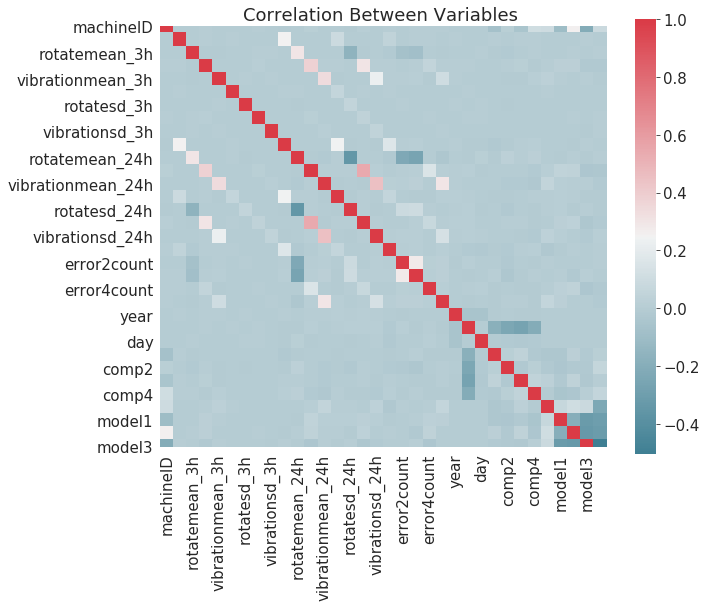

In [100]:
### Correlation Analysis
# It is necessary to eliminate the variables with high correlation (only one), consider> 70%.
f, ax = plt.subplots(figsize=(10, 8))
corr = labeled_features.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title("Correlation Between Variables ")
plt.show()

In [101]:
# We save to apply hyper-parameter optimization.
#labeled_features.to_pickle("final_datset.pickle")

In [102]:
# We establish the times corresponding to the records that will be used for training and tests.
import pandas as pd
threshold_dates = [
    pd.to_datetime("2015-09-30 01:00:00"), pd.to_datetime("2015-10-01 01:00:00")
]

In [103]:
test_results = []
models = []
total = len(threshold_dates)

In [104]:
# We make the partition of separate dates.
last_train_date = threshold_dates[0]
first_test_date = threshold_dates[1]

In [105]:
# Typically 20-30% of data is used.
ntraining = labeled_features.loc[labeled_features["datetime"] < last_train_date]
ntesting = labeled_features.loc[labeled_features["datetime"] > first_test_date]
print(f"{ntraining.shape[0]} records for training.")
print(f"{ntesting.shape[0]} records for testing.")
print(f"{ntesting.shape[0] / ntraining.shape[0] * 100:0.1f}% of the data will be used for testing.")

215933 records for training.
73809 records for testing.
34.2% of the data will be used for testing.


In [106]:
fails_train = ntraining[ntraining["failure"] != "none"].shape[0]
no_fails_train = ntraining[ntraining["failure"] == "none"].shape[0]
fails_test = ntesting[ntesting["failure"] != "none"].shape[0]
no_fails_test = ntesting[ntesting["failure"] == "none"].shape[0]

In [107]:
print(f"{fails_train / no_fails_train * 100:0.1f}% of the cases are training set failures.")
print(f"{fails_test / no_fails_test * 100:0.1f}% of the cases are failures in the test set.")

4.1% of the cases are training set failures.
3.8% of the cases are failures in the test set.


In [108]:

# We assign the corresponding values ​​to training and tests.
train_y = labeled_features.loc[labeled_features["datetime"] < last_train_date, "failure"]
train_X = labeled_features.loc[labeled_features["datetime"] < last_train_date].drop(["datetime",
                                                                                    "machineID",
                                                                                    "failure"], axis=1)
test_y = labeled_features.loc[labeled_features["datetime"] > first_test_date, "failure"]
test_X = labeled_features.loc[labeled_features["datetime"] > first_test_date].drop(["datetime",
                                                                                   "machineID",
                                                                                   "failure"], axis=1)

In [109]:
train_y
test_y

2167      none
2168      none
2169      none
2170      none
2171      none
          ... 
290537    none
290538    none
290539    none
290540    none
290541    none
Name: failure, Length: 73809, dtype: category
Categories (5, object): ['comp1', 'comp2', 'comp3', 'comp4', 'none']

In [110]:
train_X

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,...,day,comp1,comp2,comp3,comp4,age,model1,model2,model3,model4
0,181.690108,472.783187,93.395164,38.621099,11.514450,47.880443,2.177029,7.670520,170.045337,449.711370,...,3,21.000,216.000,156.000,171.000,18,0,0,1,0
1,172.382935,505.141261,98.524373,49.965572,7.065150,56.849540,5.230039,2.687565,170.074009,450.574966,...,3,21.125,216.125,156.125,171.125,18,0,0,1,0
2,174.303858,436.182686,94.092681,50.999589,19.017196,26.420163,7.661944,3.516734,170.379989,455.440349,...,3,21.250,216.250,156.250,171.250,18,0,0,1,0
3,176.246348,451.646684,98.102389,59.198241,12.572504,31.574383,15.559351,6.562087,171.142547,453.967427,...,3,21.375,216.375,156.375,171.375,18,0,0,1,0
4,158.433533,453.900213,98.878129,46.851925,5.136952,21.216569,11.400650,2.688559,171.018509,456.380525,...,3,21.500,216.500,156.500,171.500,18,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289791,155.079380,450.187759,101.838938,44.109299,23.896443,26.392918,10.179211,7.432649,164.724827,440.176947,...,29,4.250,64.250,49.250,34.250,5,0,0,0,1
289792,185.390529,435.256907,92.831119,43.530138,18.810846,78.604196,10.683806,0.878059,164.380783,441.965814,...,29,4.375,64.375,49.375,34.375,5,0,0,0,1
289793,166.113912,444.157407,103.054512,38.293968,13.242216,34.509446,7.649707,3.353351,166.993895,443.855404,...,29,4.500,64.500,49.500,34.500,5,0,0,0,1
289794,157.015479,468.556698,106.294096,42.696208,13.348122,79.293067,7.683379,6.912312,166.417083,446.578073,...,29,4.625,64.625,49.625,34.625,5,0,0,0,1


In [111]:
# %%timeit
# Model training.
# model = GradientBoostingClassifier(random_state=42)
model = xgb(n_jobs=-1)
model.fit(train_X, train_y)

[09:51:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [112]:
from xgboost import XGBClassifier
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=None, colsample_bytree=1,
              enable_categorical=False, gamma=0, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, nthread=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, tree_method=None, ...)

In [113]:
# We obtain results on the test set.
test_result = pd.DataFrame(labeled_features.loc[labeled_features["datetime"] > first_test_date])
test_result["predicted_failure"] = model.predict(test_X)
test_results.append(test_result)
models.append(model)

In [114]:
test_results

[        machineID            datetime  voltmean_3h  rotatemean_3h  \
 2167            1 2015-10-01 03:00:00   170.301017     449.036995   
 2168            1 2015-10-01 06:00:00   165.339972     435.660354   
 2169            1 2015-10-01 09:00:00   183.752875     463.058640   
 2170            1 2015-10-01 12:00:00   177.866822     506.692032   
 2171            1 2015-10-01 15:00:00   167.471524     425.963281   
 ...           ...                 ...          ...            ...   
 290537        100 2015-12-31 18:00:00   177.758754     458.391629   
 290538        100 2015-12-31 21:00:00   166.078945     424.431184   
 290539        100 2016-01-01 00:00:00   158.327984     504.056262   
 290540        100 2016-01-01 03:00:00   170.306956     438.653616   
 290541        100 2016-01-01 06:00:00   182.525427     435.932056   
 
         pressuremean_3h  vibrationmean_3h  voltsd_3h  rotatesd_3h  \
 2167          94.805205         40.816797  11.061667    58.425055   
 2168         103.

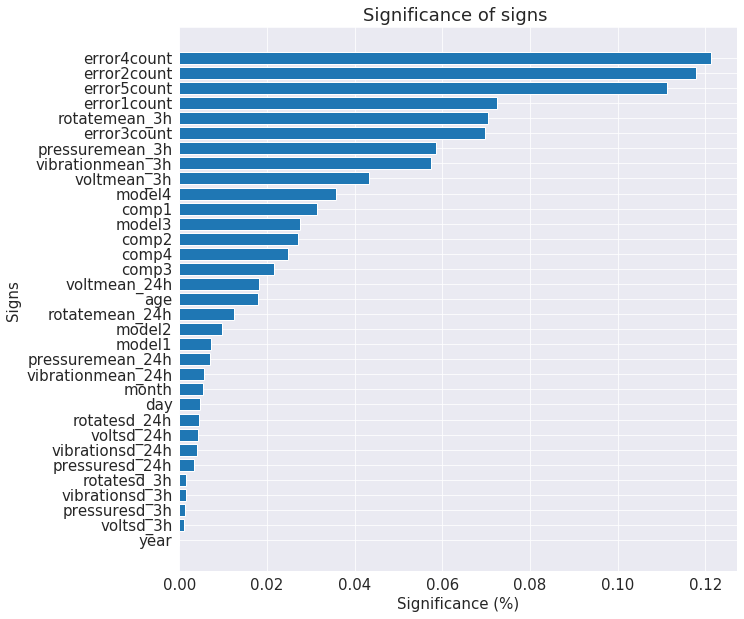

In [115]:
# Below, we plot the feature importances in the (first) trained model
plt.figure(figsize=(10, 10))
labels, importances = zip(*sorted(zip(test_X.columns, models[0].feature_importances_), reverse=False, key=lambda x: x[1]))
plt.yticks(range(len(labels)), labels)
_, labels = plt.xticks()
plt.setp(labels, rotation=0)
plt.barh(range(len(importances)), importances)
plt.ylabel("Signs ")
plt.xlabel("Significance (%)")
plt.title("Significance of signs ")
plt.show()

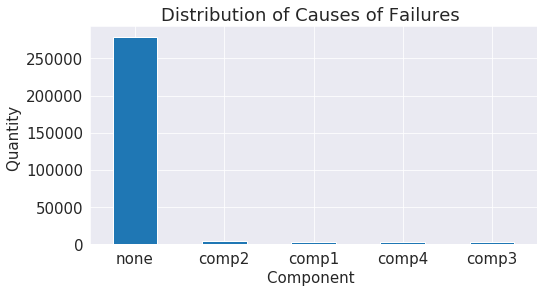

In [116]:
# There is an expected imbalance.
plt.figure(figsize=(8, 4))
labeled_features["failure"].value_counts().plot(kind="bar", rot=0)
plt.title("Distribution of Causes of Failures ")
plt.xlabel("Component ")
plt.ylabel("Quantity ")
plt.show()

In [117]:
def Evaluate(predicted, actual, labels):
    output_labels = []
    output = []
    
    # Calculate and display confusion matrix
    cm = confusion_matrix(actual, predicted, labels=labels)
    #print("Confusion matrix\n- x-axis is true labels (none, comp1, etc.)\n- y-axis is predicted labels")
    #print(cm)
    
    # Calculate precision, recall, and F1 score
    accuracy = np.array([float(np.trace(cm)) / np.sum(cm)] * len(labels))
    precision = precision_score(actual, predicted, average=None, labels=labels)
    recall = recall_score(actual, predicted, average=None, labels=labels)
    f1 = 2 * precision * recall / (precision + recall)
    output.extend([accuracy.tolist(), precision.tolist(), recall.tolist(), f1.tolist()])
    output_labels.extend(["accuracy", "precision", "recall", "F1"])
    
    # Calculate the macro versions of these metrics
    output.extend([[np.mean(precision)] * len(labels),
                   [np.mean(recall)] * len(labels),
                   [np.mean(f1)] * len(labels)])
    output_labels.extend(["macro precision", "macro recall", "macro F1"])
    
    # Find the one-vs.-all confusion matrix
    cm_row_sums = cm.sum(axis = 1)
    cm_col_sums = cm.sum(axis = 0)
    s = np.zeros((2, 2))
    for i in range(len(labels)):
        v = np.array([[cm[i, i],
                       cm_row_sums[i] - cm[i, i]],
                      [cm_col_sums[i] - cm[i, i],
                       np.sum(cm) + cm[i, i] - (cm_row_sums[i] + cm_col_sums[i])]])
        s += v
    s_row_sums = s.sum(axis = 1)
    
    # Add average accuracy and micro-averaged  precision/recall/F1
    avg_accuracy = [np.trace(s) / np.sum(s)] * len(labels)
    micro_prf = [float(s[0,0]) / s_row_sums[0]] * len(labels)
    output.extend([avg_accuracy, micro_prf])
    output_labels.extend(["average accuracy",
                          "micro-averaged precision/recall/F1"])
    
    # Compute metrics for the majority classifier
    mc_index = np.where(cm_row_sums == np.max(cm_row_sums))[0][0]
    cm_row_dist = cm_row_sums / float(np.sum(cm))
    mc_accuracy = 0 * cm_row_dist; mc_accuracy[mc_index] = cm_row_dist[mc_index]
    mc_recall = 0 * cm_row_dist; mc_recall[mc_index] = 1
    mc_precision = 0 * cm_row_dist
    mc_precision[mc_index] = cm_row_dist[mc_index]
    mc_F1 = 0 * cm_row_dist;
    mc_F1[mc_index] = 2 * mc_precision[mc_index] / (mc_precision[mc_index] + 1)
    output.extend([mc_accuracy.tolist(), mc_recall.tolist(),
                   mc_precision.tolist(), mc_F1.tolist()])
    output_labels.extend(["majority class accuracy", "majority class recall",
                          "majority class precision", "majority class F1"])
        
    # Random accuracy and kappa
    cm_col_dist = cm_col_sums / float(np.sum(cm))
    exp_accuracy = np.array([np.sum(cm_row_dist * cm_col_dist)] * len(labels))
    kappa = (accuracy - exp_accuracy) / (1 - exp_accuracy)
    output.extend([exp_accuracy.tolist(), kappa.tolist()])
    output_labels.extend(["expected accuracy", "kappa"])
    

    # Random guess
    rg_accuracy = np.ones(len(labels)) / float(len(labels))
    rg_precision = cm_row_dist
    rg_recall = np.ones(len(labels)) / float(len(labels))
    rg_F1 = 2 * cm_row_dist / (len(labels) * cm_row_dist + 1)
    output.extend([rg_accuracy.tolist(), rg_precision.tolist(),
                   rg_recall.tolist(), rg_F1.tolist()])
    output_labels.extend(["random guess accuracy", "random guess precision",
                          "random guess recall", "random guess F1"])
    
    # Random weighted guess
    rwg_accuracy = np.ones(len(labels)) * sum(cm_row_dist**2)
    rwg_precision = cm_row_dist
    rwg_recall = cm_row_dist
    rwg_F1 = cm_row_dist
    output.extend([rwg_accuracy.tolist(), rwg_precision.tolist(),
                   rwg_recall.tolist(), rwg_F1.tolist()])
    output_labels.extend(["random weighted guess accuracy",
                          "random weighted guess precision",
                          "random weighted guess recall",
                          "random weighted guess F1"])

    output_df = pd.DataFrame(output, columns=labels)
    output_df.index = output_labels
                  
    return output_df



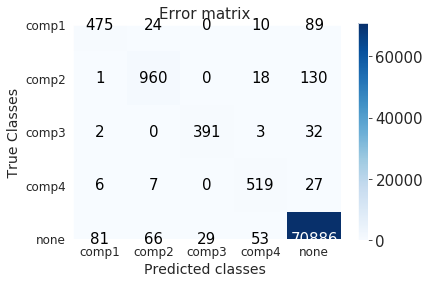

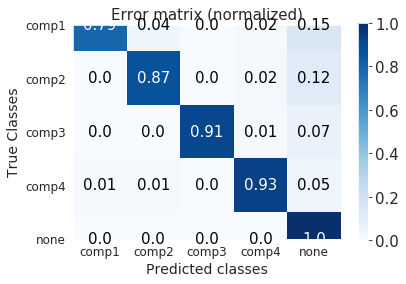

In [118]:
evaluation_results = []
test_result = test_results[0]
evaluation_result = Evaluate(actual = test_result["failure"],
                             predicted = test_result["predicted_failure"],
                             labels = ["none", "comp1", "comp2", "comp3", "comp4"])
skplt.metrics.plot_confusion_matrix(
    test_result["failure"],
    test_result["predicted_failure"],
    normalize=False,
    title=" Error matrix "
)
plt.ylabel(' True Classes ', fontsize=14)
plt.xlabel('Predicted classes ', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Error matrix ", fontsize=15)

skplt.metrics.plot_confusion_matrix(
    test_result["failure"],
    test_result["predicted_failure"],
    normalize=True,
)
plt.ylabel('True Classes', fontsize=14)
plt.xlabel('Predicted classes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Error matrix (normalized)", fontsize=15)

plt.show()



In [119]:
evaluation_results.append(evaluation_result)
evaluation_results[0]  # show full results for first split only

,none,comp1,comp2,comp3,comp4
accuracy,0.992169,0.992169,0.992169,0.992169,0.992169
precision,0.996094,0.840708,0.908231,0.930952,0.860697
recall,0.996780,0.794314,0.865645,0.913551,0.928444
F1,0.996437,0.816853,0.886427,0.922170,0.893287
macro precision,0.907336,0.907336,0.907336,0.907336,0.907336
macro recall,0.899747,0.899747,0.899747,0.899747,0.899747
macro F1,0.903035,0.903035,0.903035,0.903035,0.903035
average accuracy,0.996868,0.996868,0.996868,0.996868,0.996868
micro-averaged precision/recall/F1,0.992169,0.992169,0.992169,0.992169,0.992169
majority class accuracy,0.963500,0.000000,0.000000,0.000000,0.000000


In [120]:
evaluation_results[0].mean(axis=1)[0:4]

accuracy     0.992169
precision    0.907336
recall       0.899747
F1           0.903035
dtype: float64

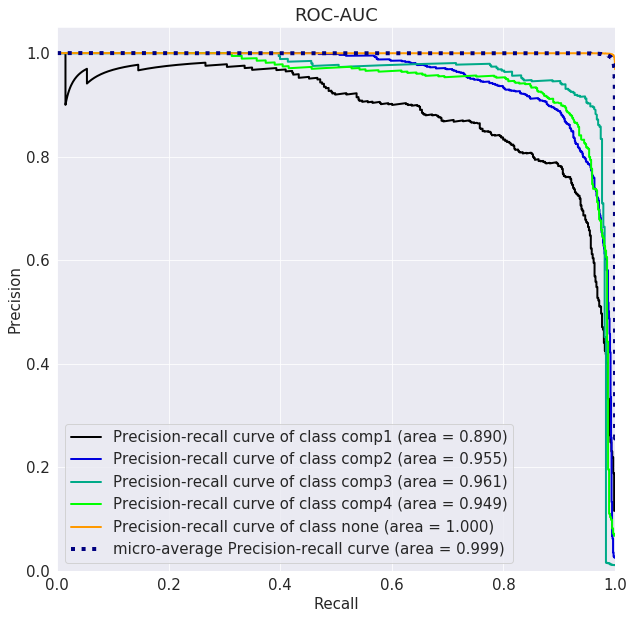

In [121]:
# For a binary classification problem, the ROC-AUC curve is generally used..
# For this multi-class case we will use precision vs sensitivity.
skplt.metrics.plot_precision_recall_curve(
    test_y,
    model.predict_proba(test_X),
    title="ROC-AUC",
    figsize=(10,10)
)
plt.show()

In [122]:
evaluation_results[0].loc["recall"].values

array([0.99677986, 0.79431438, 0.86564472, 0.9135514 , 0.92844365])

In [123]:
# true failures that the model did not predict 
# If the recall rates for all components as well as no failure are all above 90% 
# meaning the model was able to capture above 90% of the failures correctly.
recall_df = pd.DataFrame([evaluation_results[0].loc["recall"].values],
                         columns=["none", "comp1", "comp2", "comp3", "comp4"],
                         index=[" Component Sensitivity "])
recall_df.T

,Component Sensitivity
none,0.996780
comp1,0.794314
comp2,0.865645
comp3,0.913551
comp4,0.928444


In [124]:
###Individual Test Case

In [125]:
test_values = train_X.iloc[0].values
test_values

array([1.81690108e+02, 4.72783187e+02, 9.33951636e+01, 3.86210994e+01,
       1.15144499e+01, 4.78804426e+01, 2.17702915e+00, 7.67052020e+00,
       1.70045337e+02, 4.49711370e+02, 9.87923907e+01, 3.94284956e+01,
       1.31320559e+01, 4.47142955e+01, 1.08266451e+01, 5.52610890e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.01500000e+03, 1.00000000e+00, 3.00000000e+00,
       2.10000000e+01, 2.16000000e+02, 1.56000000e+02, 1.71000000e+02,
       1.80000000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00])

In [126]:
train_X

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,...,day,comp1,comp2,comp3,comp4,age,model1,model2,model3,model4
0,181.690108,472.783187,93.395164,38.621099,11.514450,47.880443,2.177029,7.670520,170.045337,449.711370,...,3,21.000,216.000,156.000,171.000,18,0,0,1,0
1,172.382935,505.141261,98.524373,49.965572,7.065150,56.849540,5.230039,2.687565,170.074009,450.574966,...,3,21.125,216.125,156.125,171.125,18,0,0,1,0
2,174.303858,436.182686,94.092681,50.999589,19.017196,26.420163,7.661944,3.516734,170.379989,455.440349,...,3,21.250,216.250,156.250,171.250,18,0,0,1,0
3,176.246348,451.646684,98.102389,59.198241,12.572504,31.574383,15.559351,6.562087,171.142547,453.967427,...,3,21.375,216.375,156.375,171.375,18,0,0,1,0
4,158.433533,453.900213,98.878129,46.851925,5.136952,21.216569,11.400650,2.688559,171.018509,456.380525,...,3,21.500,216.500,156.500,171.500,18,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289791,155.079380,450.187759,101.838938,44.109299,23.896443,26.392918,10.179211,7.432649,164.724827,440.176947,...,29,4.250,64.250,49.250,34.250,5,0,0,0,1
289792,185.390529,435.256907,92.831119,43.530138,18.810846,78.604196,10.683806,0.878059,164.380783,441.965814,...,29,4.375,64.375,49.375,34.375,5,0,0,0,1
289793,166.113912,444.157407,103.054512,38.293968,13.242216,34.509446,7.649707,3.353351,166.993895,443.855404,...,29,4.500,64.500,49.500,34.500,5,0,0,0,1
289794,157.015479,468.556698,106.294096,42.696208,13.348122,79.293067,7.683379,6.912312,166.417083,446.578073,...,29,4.625,64.625,49.625,34.625,5,0,0,0,1


In [127]:
# XGBoost accepts only 2-dimensional arrays.
single_test = pd.DataFrame([test_values], columns=test_X.columns, index=[0])
single_test

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,...,day,comp1,comp2,comp3,comp4,age,model1,model2,model3,model4
0,181.690108,472.783187,93.395164,38.621099,11.51445,47.880443,2.177029,7.67052,170.045337,449.71137,...,3.0,21.0,216.0,156.0,171.0,18.0,0.0,0.0,1.0,0.0


In [128]:
probas = model.predict_proba(single_test)
probas

array([[1.2093350e-04, 1.1933523e-05, 1.1600700e-05, 2.5654403e-05,
        9.9982989e-01]], dtype=float32)

In [129]:
prediction = model.predict(single_test)
prediction

array(['none'], dtype=object)

In [130]:
ordered_classes = np.unique(np.array(test_y))
ordered_classes

array(['comp1', 'comp2', 'comp3', 'comp4', 'none'], dtype=object)

In [131]:
gr_test = pd.DataFrame(test_X.values, columns=test_X.columns)
gr_test

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,...,day,comp1,comp2,comp3,comp4,age,model1,model2,model3,model4
0,170.301017,449.036995,94.805205,40.816797,11.061667,58.425055,4.931305,2.428740,173.073695,450.656341,...,1.0,28.875,13.875,118.875,28.875,18.0,0.0,0.0,1.0,0.0
1,165.339972,435.660354,103.351320,31.892462,10.717864,26.009485,22.071933,6.020669,172.953659,444.550364,...,1.0,29.000,14.000,119.000,29.000,18.0,0.0,0.0,1.0,0.0
2,183.752875,463.058640,109.525083,41.945037,9.369264,43.646584,10.859804,9.395067,173.553126,443.334754,...,1.0,29.125,14.125,119.125,29.125,18.0,0.0,0.0,1.0,0.0
3,177.866822,506.692032,98.745260,39.861149,16.596090,38.086352,10.410456,5.418325,174.467719,444.547078,...,1.0,29.250,14.250,119.250,29.250,18.0,0.0,0.0,1.0,0.0
4,167.471524,425.963281,111.996389,39.396999,9.015089,63.342755,4.648154,6.365146,174.948219,444.734216,...,1.0,29.375,14.375,119.375,29.375,18.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73804,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,167.372377,450.156036,...,31.0,82.500,7.500,82.500,52.500,5.0,0.0,0.0,0.0,1.0
73805,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,168.958469,455.292777,...,31.0,82.625,7.625,82.625,52.625,5.0,0.0,0.0,0.0,1.0
73806,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,168.239531,457.625992,...,1.0,82.750,7.750,82.750,52.750,5.0,0.0,0.0,0.0,1.0
73807,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,168.979139,460.212467,...,1.0,82.875,7.875,82.875,52.875,5.0,0.0,0.0,0.0,1.0


In [132]:
probas = model.predict_proba(gr_test)
prediction = model.predict(gr_test)
prediction

array(['none', 'none', 'none', ..., 'none', 'none', 'none'], dtype=object)

In [133]:
ordered_classes = np.unique(np.array(test_y))
ordered_classes

array(['comp1', 'comp2', 'comp3', 'comp4', 'none'], dtype=object)

In [134]:
results = pd.DataFrame(probas,
                       columns=ordered_classes)
results

,comp1,comp2,comp3,comp4,none
0,1.034839e-03,1.835651e-05,9.308553e-06,1.586812e-05,0.998922
1,1.492934e-03,2.289384e-05,1.096548e-05,1.016170e-05,0.998463
2,2.036955e-04,3.649595e-06,3.549200e-06,4.781544e-06,0.999784
3,4.553976e-04,4.558364e-06,2.462423e-06,1.798691e-06,0.999536
4,2.423962e-04,2.160569e-05,5.414663e-06,2.262065e-06,0.999728
...,...,...,...,...,...
73804,8.811764e-06,8.953824e-08,2.745228e-08,1.112069e-06,0.999990
73805,1.249952e-06,5.626007e-08,3.412242e-08,4.039914e-08,0.999999
73806,1.564323e-07,3.552047e-08,8.165093e-08,8.780928e-08,1.000000
73807,1.025579e-06,7.052044e-08,1.480924e-07,5.505177e-07,0.999998


In [135]:
print(f" Prediction: {prediction}")
results

 Prediction: ['none' 'none' 'none' ... 'none' 'none' 'none']


,comp1,comp2,comp3,comp4,none
0,1.034839e-03,1.835651e-05,9.308553e-06,1.586812e-05,0.998922
1,1.492934e-03,2.289384e-05,1.096548e-05,1.016170e-05,0.998463
2,2.036955e-04,3.649595e-06,3.549200e-06,4.781544e-06,0.999784
3,4.553976e-04,4.558364e-06,2.462423e-06,1.798691e-06,0.999536
4,2.423962e-04,2.160569e-05,5.414663e-06,2.262065e-06,0.999728
...,...,...,...,...,...
73804,8.811764e-06,8.953824e-08,2.745228e-08,1.112069e-06,0.999990
73805,1.249952e-06,5.626007e-08,3.412242e-08,4.039914e-08,0.999999
73806,1.564323e-07,3.552047e-08,8.165093e-08,8.780928e-08,1.000000
73807,1.025579e-06,7.052044e-08,1.480924e-07,5.505177e-07,0.999998


In [136]:
np.unique(prediction, return_counts = True)

(array(['comp1', 'comp2', 'comp3', 'comp4', 'none'], dtype=object),
 array([  565,  1057,   420,   603, 71164]))

In [137]:
for i, j in zip(prediction, range(len(prediction))):
    if i != 'none':
        print(prediction[j], 1-results.none[j])

comp2 0.9198466762900352
comp2 0.5898241996765137
comp2 0.7068297863006592
comp2 0.9834545329213142
comp2 0.988373301923275
comp2 0.9190669283270836
comp2 0.8618738055229187
comp2 0.9995081105153076
comp2 0.9994230733136646
comp2 0.9998423318029381
comp2 0.9997534290305339
comp2 0.9998615390795749
comp2 0.9868506044149399
comp2 0.9995414358563721
comp2 0.9994331719353795
comp4 0.6427779197692871
comp4 0.9720673393458128
comp4 0.9926068331114948
comp2 0.9250765442848206
comp4 0.9637209735810757
comp4 0.9711344186216593
comp4 0.9599918387830257
comp4 0.9988881032913923
comp4 0.9828786812722683
comp4 0.999123883259017
comp4 0.9987152874236926
comp4 0.9985168139683083
comp4 0.9988052846165374
comp4 0.9985153789166361
comp4 0.9973418659064919
comp2 0.8758073896169662
comp1 0.7995185106992722
comp1 0.5944156050682068
comp1 0.5524069368839264
comp1 0.7918832749128342
comp1 0.9350576028227806
comp1 0.787234365940094
comp1 0.634933203458786
comp1 0.5989532172679901
comp2 0.7863399386405945
comp

comp2 0.7717595249414444
comp1 0.5454569160938263
comp1 0.5298123955726624
comp1 0.8942436799407005
comp1 0.8594977557659149
comp1 0.9191257730126381
comp1 0.9450980499386787
comp1 0.9888769844546914
comp1 0.9706210382282734
comp1 0.9667883515357971
comp1 0.9243111088871956
comp1 0.9442487992346287
comp1 0.96803979575634
comp1 0.9545408748090267
comp1 0.953921727836132
comp1 0.995008438359946
comp1 0.9973406032659113
comp2 0.7598120272159576
comp2 0.7916524708271027
comp2 0.7207443714141846
comp2 0.856808602809906
comp2 0.7634269893169403
comp2 0.7658325880765915
comp2 0.870454952120781
comp2 0.9949701493605971
comp2 0.9996945827733725
comp2 0.9969627782702446
comp2 0.9982006978243589
comp2 0.9809323363006115
comp2 0.9993513975059614
comp2 0.9997087672527414
comp2 0.9994891245150939
comp1 0.9288792088627815
comp1 0.9323604106903076
comp1 0.7371437549591064
comp1 0.9610419496893883
comp1 0.9481232054531574
comp1 0.9548071548342705
comp1 0.8319127857685089
comp4 0.9536928161978722
comp4 

comp3 0.9963114112615585
comp3 0.9959609434008598
comp3 0.9968312480486929
comp3 0.9968782556243241
comp3 0.9965129010379314
comp3 0.9995912004087586
comp3 0.9998158924281597
comp3 0.9989221136784181
comp3 0.9998747724312125
comp3 0.9999031164043117
comp3 0.9998752938699909
comp3 0.99993434100179
comp3 0.999639443558408
comp2 0.7150811553001404
comp2 0.8879403248429298
comp2 0.9097577705979347
comp2 0.9186330810189247
comp2 0.9750856310129166
comp2 0.9433113187551498
comp2 0.9997467452194542
comp2 0.9998223877191776
comp2 0.9992683726013638
comp2 0.9956561326980591
comp2 0.9966352649498731
comp2 0.9855580348521471
comp2 0.9994723669951782
comp2 0.9998960960801924
comp4 0.9922923119738698
comp4 0.9934740364551544
comp4 0.9777359645813704
comp4 0.9964997733477503
comp4 0.9963744529522955
comp4 0.9961296101100743
comp4 0.9922474850900471
comp4 0.9888506410643458
comp4 0.999255889619235
comp4 0.9998732488456881
comp4 0.9996552204829641
comp4 0.9971666438505054
comp4 0.9998877409743727
comp

In [138]:
test_X.head()

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,...,day,comp1,comp2,comp3,comp4,age,model1,model2,model3,model4
2167,170.301017,449.036995,94.805205,40.816797,11.061667,58.425055,4.931305,2.428740,173.073695,450.656341,...,1,28.875,13.875,118.875,28.875,18,0,0,1,0
2168,165.339972,435.660354,103.351320,31.892462,10.717864,26.009485,22.071933,6.020669,172.953659,444.550364,...,1,29.000,14.000,119.000,29.000,18,0,0,1,0
2169,183.752875,463.058640,109.525083,41.945037,9.369264,43.646584,10.859804,9.395067,173.553126,443.334754,...,1,29.125,14.125,119.125,29.125,18,0,0,1,0
2170,177.866822,506.692032,98.745260,39.861149,16.596090,38.086352,10.410456,5.418325,174.467719,444.547078,...,1,29.250,14.250,119.250,29.250,18,0,0,1,0
2171,167.471524,425.963281,111.996389,39.396999,9.015089,63.342755,4.648154,6.365146,174.948219,444.734216,...,1,29.375,14.375,119.375,29.375,18,0,0,1,0


In [139]:
train_X.head(20)

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,...,day,comp1,comp2,comp3,comp4,age,model1,model2,model3,model4
0,181.690108,472.783187,93.395164,38.621099,11.514450,47.880443,2.177029,7.670520,170.045337,449.711370,...,3,21.000,216.000,156.000,171.000,18,0,0,1,0
1,172.382935,505.141261,98.524373,49.965572,7.065150,56.849540,5.230039,2.687565,170.074009,450.574966,...,3,21.125,216.125,156.125,171.125,18,0,0,1,0
2,174.303858,436.182686,94.092681,50.999589,19.017196,26.420163,7.661944,3.516734,170.379989,455.440349,...,3,21.250,216.250,156.250,171.250,18,0,0,1,0
3,176.246348,451.646684,98.102389,59.198241,12.572504,31.574383,15.559351,6.562087,171.142547,453.967427,...,3,21.375,216.375,156.375,171.375,18,0,0,1,0
4,158.433533,453.900213,98.878129,46.851925,5.136952,21.216569,11.400650,2.688559,171.018509,456.380525,...,3,21.500,216.500,156.500,171.500,18,0,0,1,0
5,162.387954,454.140377,92.651129,54.261635,4.563331,57.747656,4.754203,5.118076,170.970856,456.102205,...,3,21.625,216.625,156.625,171.625,18,0,0,1,0
6,174.243192,394.998095,99.829845,46.930738,6.268730,29.167663,10.564287,6.822855,170.170579,456.234455,...,4,21.750,216.750,156.750,171.750,18,0,0,1,0
7,176.443361,459.528820,111.855296,55.296056,16.330285,20.602657,7.064583,4.651468,171.143076,451.965815,...,4,21.875,216.875,156.875,171.875,18,0,0,1,0
8,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,171.793403,453.626093,...,4,22.000,217.000,157.000,172.000,18,0,0,1,0
9,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,170.787792,452.601918,...,4,22.125,217.125,157.125,172.125,18,0,0,1,0


In [140]:
train_y.head(100)

0      none
1     comp4
2     comp4
3     comp4
4     comp4
      ...  
95     none
96     none
97     none
98     none
99     none
Name: failure, Length: 100, dtype: category
Categories (5, object): ['comp1', 'comp2', 'comp3', 'comp4', 'none']

In [141]:
labeled_features.loc[labeled_features['failure'] != 'none'].sample(5)

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,comp1,comp2,comp3,comp4,age,failure,model1,model2,model3,model4
80222,28,2015-08-12 09:00:00,190.989652,465.262465,92.890569,37.053196,5.120825,39.996018,7.539674,3.487384,...,73.125,58.125,58.125,13.125,1,comp1,0,0,0,1
114632,40,2015-06-16 09:00:00,160.087513,406.422298,102.712903,39.098766,10.768147,59.769929,5.374272,5.604926,...,58.125,103.125,13.125,13.125,4,comp2,0,1,0,0
240499,83,2015-10-12 06:00:00,196.608138,373.589979,97.054902,39.845249,10.306086,30.524088,2.558966,5.198044,...,44.000,29.000,14.000,59.000,18,comp1,0,0,0,1
283241,98,2015-06-29 03:00:00,204.879148,428.216865,105.441589,48.854732,9.556246,28.125709,6.886746,5.106260,...,44.875,14.875,29.875,59.875,20,comp1,0,1,0,0
209541,73,2015-02-15 21:00:00,169.611721,433.244335,103.141201,49.313677,7.352055,40.118265,9.972744,11.797011,...,44.625,79.625,29.625,229.625,20,comp4,0,1,0,0


In [142]:
test_value_2 = train_X.iloc[41].values
test_value_2


array([1.73734505e+02, 4.55982513e+02, 9.98226026e+01, 4.02895584e+01,
       7.49504385e+00, 3.99850347e+01, 1.09343855e+01, 3.74700510e+00,
       1.71506462e+02, 4.48358364e+02, 9.96324216e+01, 4.17258804e+01,
       1.51577255e+01, 4.24645050e+01, 9.91186215e+00, 4.79710439e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.01500000e+03, 1.00000000e+00, 8.00000000e+00,
       3.12500000e+00, 2.21125000e+02, 1.61125000e+02, 3.12500000e+00,
       1.80000000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00])

In [143]:
single_test_2 = pd.DataFrame([test_value_2], columns=test_X.columns, index=[0])
single_test_2


,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,...,day,comp1,comp2,comp3,comp4,age,model1,model2,model3,model4
0,173.734505,455.982513,99.822603,40.289558,7.495044,39.985035,10.934385,3.747005,171.506462,448.358364,...,8.0,3.125,221.125,161.125,3.125,18.0,0.0,0.0,1.0,0.0


In [144]:
prediction = model.predict(single_test_2)
prediction

array(['none'], dtype=object)

In [145]:
test_value_3 = train_X.iloc[44].values
test_value_3

array([1.76497311e+02, 4.42865743e+02, 1.01707457e+02, 3.91042430e+01,
       7.59173753e+00, 2.69643966e+01, 1.12369105e+01, 3.10920725e+00,
       1.71558273e+02, 4.48573032e+02, 9.99870958e+01, 4.11140459e+01,
       1.42546449e+01, 3.97144322e+01, 1.06004948e+01, 4.92433957e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.01500000e+03, 1.00000000e+00, 8.00000000e+00,
       3.50000000e+00, 2.21500000e+02, 1.61500000e+02, 3.50000000e+00,
       1.80000000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00])

In [146]:
single_test_3 = pd.DataFrame([test_value_3], columns=test_X.columns, index=[0])
single_test_3

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,...,day,comp1,comp2,comp3,comp4,age,model1,model2,model3,model4
0,176.497311,442.865743,101.707457,39.104243,7.591738,26.964397,11.23691,3.109207,171.558273,448.573032,...,8.0,3.5,221.5,161.5,3.5,18.0,0.0,0.0,1.0,0.0


In [147]:
prediction = model.predict(single_test_3)
prediction

array(['none'], dtype=object)

In [148]:
test_value_3 = train_X.iloc[45].values
single_test_3 = pd.DataFrame([test_value_3], columns=test_X.columns, index=[0])
prediction = model.predict(single_test_3)
prediction


array(['none'], dtype=object)

In [149]:

test_value_3 = train_X.iloc[236920].values
single_test_3 = pd.DataFrame([test_value_3], columns=test_X.columns, index=[0])
prediction = model.predict(single_test_3)
prediction


IndexError: single positional indexer is out-of-bounds

In [ ]:
# Rand_df = pd.DataFrame({'Actual': test_y, 'Predicted': prediction})
# Rand_df


In [ ]:
# # Rand_df.loc[Rand_df['Predicted'] != 'none']
# Rand_df[((Rand_df['Actual'] ) != (Rand_df['Predicted']))]

In [ ]:
#####Different Alg
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
clf = RandomForestClassifier()
# clf = MultinomialNB()
# clf = LogisticRegression()
# clf = svm.SVC()
# clf = KNeighborsClassifier()
# unite the features and classifier together
pipe = Pipeline([
                 ('clf',clf)
                 ])



In [ ]:
# # pipe = Pipeline([('scaler', StandardScaler()),  ('nB',MultinomialNB()), ('rf',RandomForestClassifier()),('KNN',KNeighborsClassifier())])
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import VarianceThreshold # Feature selector
# pipe = Pipeline([
# ('scaler', StandardScaler()),
# ('selector', VarianceThreshold()),
# ('classifier', KNeighborsClassifier())
# ])

In [ ]:
pipe.fit(train_X, train_y)
preds = pipe.predict(test_X)

In [ ]:
print('Training set score: ' + str(pipe.score(train_X, train_y)))
print('Test set score: ' + str(pipe.score(test_X, test_y)))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y,preds))

In [ ]:
Rand_df = pd.DataFrame({'Actual': test_y, 'Predicted': preds})
Rand_df


In [ ]:
Rand_df[((Rand_df['Actual'] ) != (Rand_df['Predicted']))]

In [ ]:
pipe

In [ ]:
preds

In [ ]:
#Create a pipeline consisting of a linear SVM, a simple Decision Tree and a simple Random Forest Classifier
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import tree
## KEEP IT FOR NOW
# Construct some pipelines
pipe_svm = Pipeline([('pca', PCA(n_components=27)),
        ('clf', svm.SVC(random_state=123))])
        
pipe_tree = Pipeline([('pca', PCA(n_components=27)),
        ('clf', tree.DecisionTreeClassifier(random_state=123))])
pipe_rf = Pipeline([('pca', PCA(n_components=27)),
        ('clf', RandomForestClassifier(random_state=123))])
# List of pipelines, List of pipeline names
pipelines = [pipe_svm, pipe_tree, pipe_rf]
pipeline_names = ['Support Vector Machine','Decision Tree','Random Forest']
# Loop to fit each of the three pipelines


In [ ]:
from sklearn.tree import DecisionTreeClassifier
for pipe in pipelines:
    # print(pipe)
    pipe.fit(train_X, train_y)
    preds = pipe.predict(test_X)
# Compare accuracies
for index, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipeline_names[index], val.score(test_X, test_y)))
    print('Training set score: ' + str(pipe.score(train_X, train_y)))
    print('Test set score: ' + str(pipe.score(test_X, test_y))) 
    print(classification_report(test_y,preds))


In [ ]:
##########

In [ ]:
######ENSEMBLE MODELS

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [ ]:
rf_clf.fit(train_X, train_y)

In [ ]:
preds_ens = rf_clf.predict(test_X)

In [ ]:
Ensemble_df = pd.DataFrame({'Actual': test_y, 'Predicted': preds_ens})
Ensemble_df

In [ ]:
Ensemble_df[((Ensemble_df['Actual'] ) != (Ensemble_df['Predicted']))]

In [ ]:
print('Training set score: ' + str(rf_clf.score(train_X, train_y)))
print('Test set score: ' + str(rf_clf.score(test_X, test_y)))
print(classification_report(test_y,preds_ens))

In [ ]:
#Bagging
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=rf_clf, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [ ]:
bag_clf.fit(train_X, train_y)

In [ ]:
bag_preds = bag_clf.predict(test_X)

In [ ]:
print('Training set score: ' + str(bag_clf.score(train_X, train_y)))
print('Test set score: ' + str(bag_clf.score(test_X, test_y)))
print(classification_report(test_y,bag_preds))

In [ ]:
preds_bag = bag_clf.predict(test_X)
Bag_df = pd.DataFrame({'Actual': test_y, 'Predicted': preds_bag})
Bag_df

In [ ]:
Bag_df[((Bag_df['Actual'] ) != (Bag_df['Predicted']))]

In [ ]:
# #Gradient Tree Boosting
# from sklearn.ensemble import GradientBoostingClassifier
# m = GradientBoostingClassifier(n_estimators=10)

# m.fit(train_X, train_y)
# Tree_ens = m.predict(test_X)
# T_ens = pd.DataFrame({'Actual': test_y, 'Predicted': Tree_ens})
# T_ens

In [ ]:
# T_ens[((T_ens['Actual'] ) != (T_ens['Predicted']))]

In [ ]:
#Voting Classifier
#The idea behind the voting classifier implementation is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. 
#Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.
from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


m = VotingClassifier(
    estimators=[('lr', LogisticRegression()), 
                ('rf', RandomForestClassifier()), 
                ('gnb', GaussianNB())], 
    voting='hard')

In [ ]:
m.fit(train_X, train_y)

In [ ]:
preds_voting = m.predict(test_X)

In [ ]:


print('Training set score: ' + str(m.score(train_X, train_y)))
print('Test set score: ' + str(m.score(test_X, test_y)))
print(classification_report(test_y,preds_voting))

In [ ]:
Voting_ens = m.predict(test_X)
Voting_e = pd.DataFrame({'Actual': test_y, 'Predicted': Voting_ens})
Voting_e

In [ ]:
Voting_e[((Voting_e['Actual'] ) != (Voting_e['Predicted']))]

In [ ]:
#AdaBoosting
from sklearn.tree import DecisionTreeClassifier
# forest = RandomForestClassifier()
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))


In [ ]:
ada.fit(train_X, train_y)

In [ ]:
preds_ada = ada.predict(test_X)

In [ ]:
from sklearn.metrics import classification_report
print('Training set score: ' + str(ada.score(train_X, train_y)))
print('Test set score: ' + str(ada.score(test_X, test_y)))
print(classification_report(test_y,preds_ada))

In [ ]:
AdaBoost_ens = ada.predict(test_X)
Ada_ens = pd.DataFrame({'Actual': test_y, 'Predicted': AdaBoost_ens})
Ada_ens

In [ ]:
Ada_ens[((Ada_ens['Actual'] ) != (Ada_ens['Predicted']))]

In [ ]:
#######################

In [ ]:
##Stacking##
from sklearn.ensemble import RandomForestClassifier
# forest = RandomForestClassifier()
# ada = AdaBoostClassifier(base_estimator=forest, n_estimators=100,
#                          learning_rate=0.5, random_state=42)
# bag_clf = BaggingClassifier(base_estimator=ada, n_estimators=50,
#                             max_samples=1.0, max_features=1.0, bootstrap=True,
#                             bootstrap_features=False, n_jobs=-1,
#                             random_state=42)
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))
bag_clf = BaggingClassifier(base_estimator=ada)

In [ ]:
bag_clf.fit(train_X, train_y)

In [ ]:
preds_stack = bag_clf.predict(test_X)

In [ ]:

print('Training set score: ' + str(bag_clf.score(train_X, train_y)))
print('Test set score: ' + str(bag_clf.score(test_X, test_y)))
print(classification_report(test_y,preds_stack))

In [ ]:
a

In [ ]:
#shap
model

In [ ]:
# !pip install shap
import shap
X_frame = labeled_features.drop(["datetime", "machineID","failure"], axis=1)
# X_frame = pd.DataFrame(data=X, columns=X.design_info.column_names)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_frame)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:,:-1], X_frame)

In [ ]:
# See how every feaure contributes to the model output
shap.summary_plot(shap_values, X_frame)

In [ ]:
shap_values

In [ ]:
shap_values = explainer(X_frame[:100])
shap.plots.bar(shap_values)

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.waterfall_plot(explainer.base_values[0], values[0], X[0])

In [ ]:
shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0])

In [ ]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0])